In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from neural import neuralNetwork
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
net = neuralNetwork(
    epoch = 30000,
    learning_rate = 0.0005,
    log_frequency = 1000
)
layer_list = [64,[70,40],10]
net.set_layer(layer_list)

<< successfully layers are updated >>


In [2]:
digit = load_digits()

x = digit.data/16
t = digit.target
t = np.identity(10)[t]
asserting = x
np.all(x == asserting)

True

In [51]:
test_acc_list = list()
train_acc_list = list()
network_list = list()
for i in range(0,30):
    print('<< noise {} [%] >>'.format(i))
    tmp_x = x
    for p in range(x.shape[0]):
        if i == 0:
            break
        for q in range(x.shape[1]):
            alpha = np.random.rand()*100/i
            if alpha < 1:
                tmp_x[p][q] = alpha
    x_train,x_test,t_train,t_test = train_test_split(
        tmp_x,
        t,
        random_state = 0
    )
    elapsed,train_acc = net.train(x_train,t_train)
    train_acc_list.append(train_acc)
    acc = net.accuracy(x_test,t_test)
    test_acc_list.append(acc)
    net.visualize()
    network_list.append(net)
    print('<< noise {} [%] done >>'.format(i))
    assert(np.all(x == asserting))

fig = plt.figure()
ax = fig.add_subplot(111)
ax_x = np.linspace(0,29,30)
ax.plot(
    ax_x,
    train_acc_list,
    marker = '.',
    label = 'train accuracy'
)
ax.plot(
    ax_x,
    test_acc_list,
    marker = '.',
    label = 'test accuracy'
)
plt.legend()
plt.show()

<< noise 0 [%] >>
--------- epoch0 ---------
loss : 2762.649730918386
accuracy : 0.05693069306930693
time : 0.0647280216217041 [sec]
--------------------------



/Users/kurokitakuo/Desktop/ロボットインテリジェンス/課題/scripts/functions.py:40: RuntimeWarning: overflow encountered in square
  loss = np.sum((y-t)**2)/2
/Users/kurokitakuo/Desktop/ロボットインテリジェンス/課題/scripts/layer.py:47: RuntimeWarning: invalid value encountered in multiply
  self.delta = self.activation(self.v,div=True)*dif
/Users/kurokitakuo/Desktop/ロボットインテリジェンス/課題/scripts/functions.py:21: RuntimeWarning: invalid value encountered in greater
  mask = (x > 0)


KeyboardInterrupt: 

In [ ]:

learning_rates = [0.0005,0.001,0.01,0.05,0.1]
all_train_acc_list = list()
all_test_acc_list = list()
all_network_list = list()


for learning_rate in learning_rates:
    
    test_acc_list = list()
    train_acc_list = list()
    network_list = list()
    for i in range(0,30):
        net = neuralNetwork(
        epoch = 25000,
        learning_rate = learning_rate,
        log_frequency = 10000
        )
        layer_list = [64,[70,40],10]
        net.set_layer(layer_list)
        print('<< noise {} [%] >>'.format(i))
        tmp_x = x.copy()
        for p in range(tmp_x.shape[0]):
            if i == 0:
                break
            for q in range(tmp_x.shape[1]):
                alpha = np.random.rand()*100/i
                if alpha < 1:
                    tmp_x[p,q] = alpha
        x_train,x_test,t_train,t_test = train_test_split(
            tmp_x,
            t,
            random_state = 0
        )
        elapsed,train_acc = net.train(x_train,t_train)
        train_acc_list.append(train_acc)
        acc = net.accuracy(x_test,t_test)
        test_acc_list.append(acc)
        net.visualize()
        print('<< noise {} [%] done >>'.format(i))
        assert(np.all(x == asserting))
        print(x)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax_x = np.linspace(0,29,30)
    ax.plot(
        ax_x,
        train_acc_list,
        marker = '.',
        label = 'train accuracy'
    )
    ax.plot(
        ax_x,
        test_acc_list,
        marker = '.',
        label = 'test accuracy'
    )
    plt.legend()
    plt.show()
    all_train_acc_list.append(train_acc_list)
    all_test_acc_list.append(test_acc_list)
    all_network_list.append(network_list)

<< successfully layers are updated >>
<< noise 0 [%] >>
--------- epoch0 ---------
loss : 554.1151158579569
accuracy : 0.10148514851485149
time : 0.0035250186920166016 [sec]
--------------------------



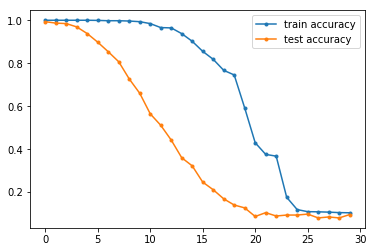

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax_x = np.linspace(0,29,30)
ax.plot(
    ax_x,
    all_train_acc_list[1],
    marker = '.',
    label = 'train accuracy'
)
ax.plot(
    ax_x,
    all_test_acc_list[1],
    marker = '.',
    label = 'test accuracy'
)
plt.legend()
plt.show()
all_train_acc_list.append(train_acc_list)
all_test_acc_list.append(test_acc_list)
all_network_list.append(network_list)

In [45]:
len(all_train_acc_list[1])

30

In [46]:
len(all_train_acc_list)

5

In [47]:
x

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

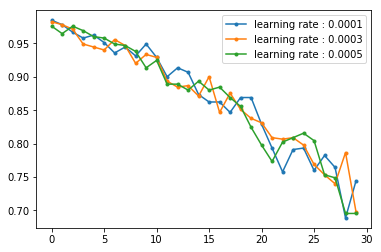

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax_x = np.linspace(0,29,30)
for i in range(3):
    ax.plot(
        ax_x,
        all_test_acc_list[i],
        marker = '.',
        label = 'learning rate : {}'.format(learning_rates[i])
    )
plt.legend()
plt.show()

<< successfully layers are updated >>
<< noise 0 [%] >>
--------- epoch0 ---------
loss : 535.798988477124
accuracy : 0.11138613861386139
time : 0.001528024673461914 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 2.004936933517456 [sec]
Train set accuracy : 0.9925760950259837


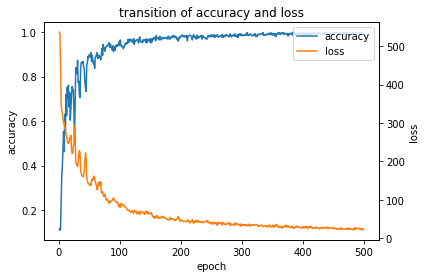

<< noise 0 [%] done >>
<< successfully layers are updated >>
<< noise 1 [%] >>
--------- epoch0 ---------
loss : 584.2313392754046
accuracy : 0.10643564356435643
time : 0.0012671947479248047 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 2.0297951698303223 [sec]
Train set accuracy : 0.9962880475129918


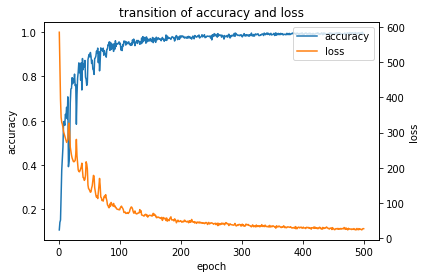

<< noise 1 [%] done >>
<< successfully layers are updated >>
<< noise 2 [%] >>
--------- epoch0 ---------
loss : 501.0984423168585
accuracy : 0.07054455445544554
time : 0.011738061904907227 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 2.27154803276062 [sec]
Train set accuracy : 0.9925760950259837


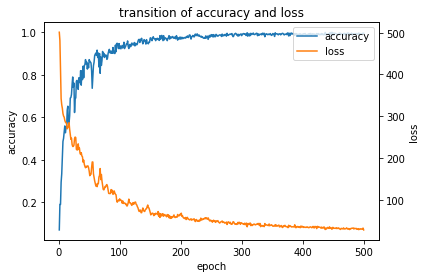

<< noise 2 [%] done >>
<< successfully layers are updated >>
<< noise 3 [%] >>
--------- epoch0 ---------
loss : 774.8979043594935
accuracy : 0.09405940594059406
time : 0.001470804214477539 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.8261208534240723 [sec]
Train set accuracy : 0.9903489235337788


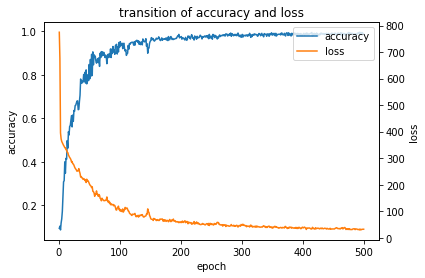

<< noise 3 [%] done >>
<< successfully layers are updated >>
<< noise 4 [%] >>
--------- epoch0 ---------
loss : 814.652891064534
accuracy : 0.0952970297029703
time : 0.0014739036560058594 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.7270760536193848 [sec]
Train set accuracy : 0.9910913140311804


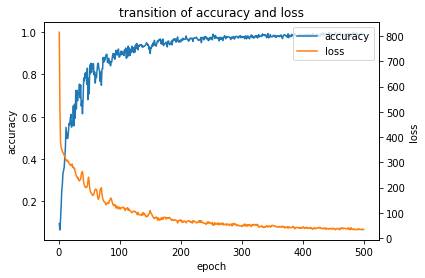

<< noise 4 [%] done >>
<< successfully layers are updated >>
<< noise 5 [%] >>
--------- epoch0 ---------
loss : 519.1530551338874
accuracy : 0.11386138613861387
time : 0.0017521381378173828 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.7063770294189453 [sec]
Train set accuracy : 0.9903489235337788


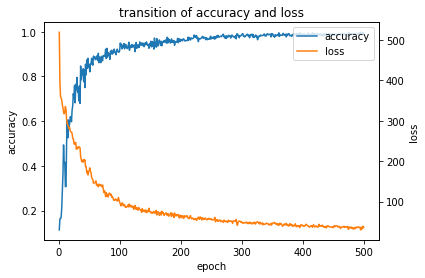

<< noise 5 [%] done >>
<< successfully layers are updated >>
<< noise 6 [%] >>
--------- epoch0 ---------
loss : 652.1624677308339
accuracy : 0.11633663366336634
time : 0.001316070556640625 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.7180790901184082 [sec]
Train set accuracy : 0.9844097995545658


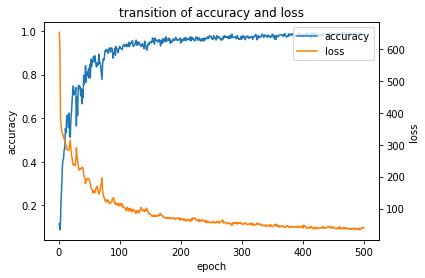

<< noise 6 [%] done >>
<< successfully layers are updated >>
<< noise 7 [%] >>
--------- epoch0 ---------
loss : 672.4050691780193
accuracy : 0.10767326732673267
time : 0.0016620159149169922 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.6691749095916748 [sec]
Train set accuracy : 0.9866369710467706


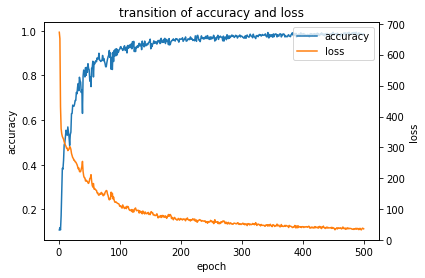

<< noise 7 [%] done >>
<< successfully layers are updated >>
<< noise 8 [%] >>
--------- epoch0 ---------
loss : 640.5361491698486
accuracy : 0.13861386138613863
time : 0.001374959945678711 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.5948679447174072 [sec]
Train set accuracy : 0.9799554565701559


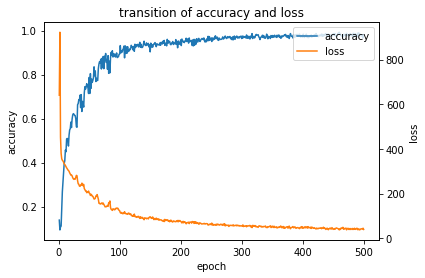

<< noise 8 [%] done >>
<< successfully layers are updated >>
<< noise 9 [%] >>
--------- epoch0 ---------
loss : 546.7695231942981
accuracy : 0.07178217821782178
time : 0.0016741752624511719 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.6741530895233154 [sec]
Train set accuracy : 0.9821826280623608


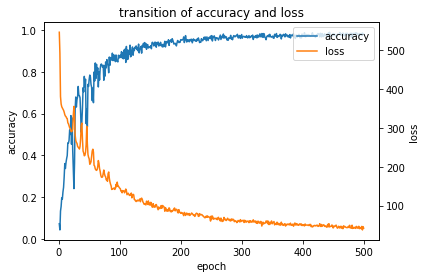

<< noise 9 [%] done >>
<< successfully layers are updated >>
<< noise 10 [%] >>
--------- epoch0 ---------
loss : 511.6236558367126
accuracy : 0.10396039603960396
time : 0.0014221668243408203 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.6867589950561523 [sec]
Train set accuracy : 0.9851521900519673


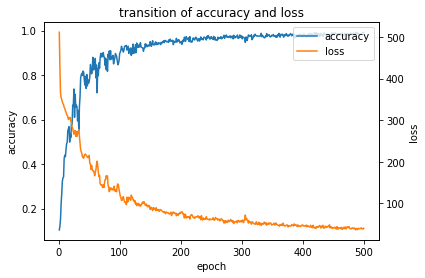

<< noise 10 [%] done >>
<< successfully layers are updated >>
<< noise 11 [%] >>
--------- epoch0 ---------
loss : 604.7246554989815
accuracy : 0.054455445544554455
time : 0.0018520355224609375 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.6767640113830566 [sec]
Train set accuracy : 0.9806978470675576


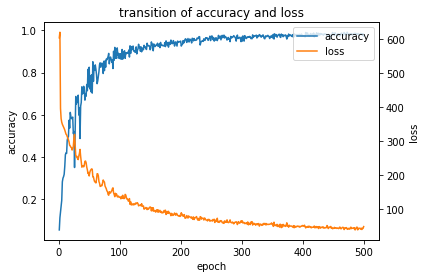

<< noise 11 [%] done >>
<< successfully layers are updated >>
<< noise 12 [%] >>
--------- epoch0 ---------
loss : 682.3606120718857
accuracy : 0.16212871287128713
time : 0.0013670921325683594 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.7557201385498047 [sec]
Train set accuracy : 0.9829250185597624


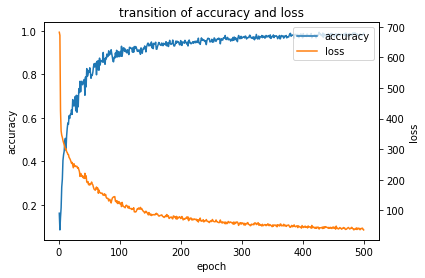

<< noise 12 [%] done >>
<< successfully layers are updated >>
<< noise 13 [%] >>
--------- epoch0 ---------
loss : 521.0508282363205
accuracy : 0.11138613861386139
time : 0.0016520023345947266 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.9046299457550049 [sec]
Train set accuracy : 0.9806978470675576


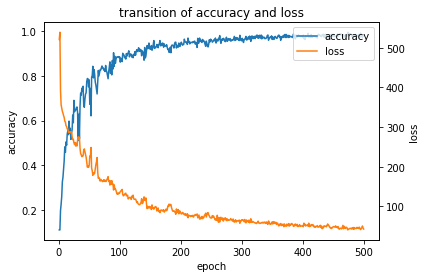

<< noise 13 [%] done >>
<< successfully layers are updated >>
<< noise 14 [%] >>
--------- epoch0 ---------
loss : 642.1981998546327
accuracy : 0.0952970297029703
time : 0.006602048873901367 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.9353370666503906 [sec]
Train set accuracy : 0.9740163325909429


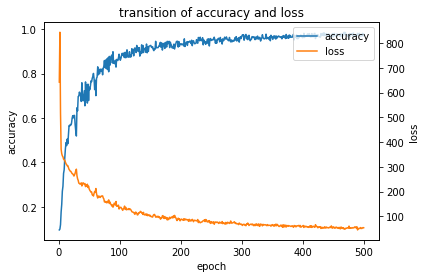

<< noise 14 [%] done >>
<< successfully layers are updated >>
<< noise 15 [%] >>
--------- epoch0 ---------
loss : 820.3897319448324
accuracy : 0.09900990099009901
time : 0.0018620491027832031 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.6420810222625732 [sec]
Train set accuracy : 0.9769858945805494


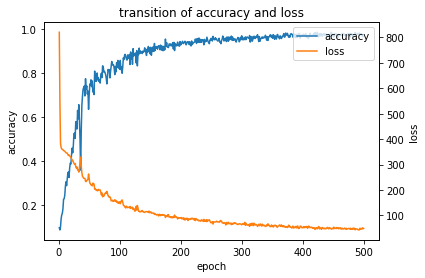

<< noise 15 [%] done >>
<< successfully layers are updated >>
<< noise 16 [%] >>
--------- epoch0 ---------
loss : 700.8147643007247
accuracy : 0.0891089108910891
time : 0.00156402587890625 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.6406409740447998 [sec]
Train set accuracy : 0.9688195991091314


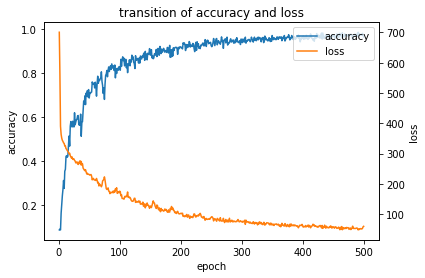

<< noise 16 [%] done >>
<< successfully layers are updated >>
<< noise 17 [%] >>
--------- epoch0 ---------
loss : 712.2795282556606
accuracy : 0.09777227722772278
time : 0.0015108585357666016 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.6655888557434082 [sec]
Train set accuracy : 0.9710467706013363


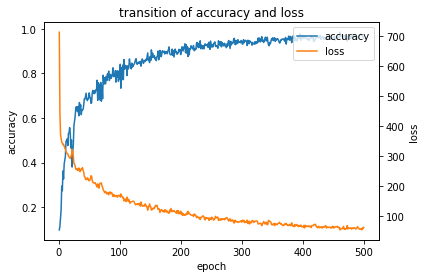

<< noise 17 [%] done >>
<< successfully layers are updated >>
<< noise 18 [%] >>
--------- epoch0 ---------
loss : 602.2327937905637
accuracy : 0.11757425742574257
time : 0.0014379024505615234 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.721902847290039 [sec]
Train set accuracy : 0.9643652561247216


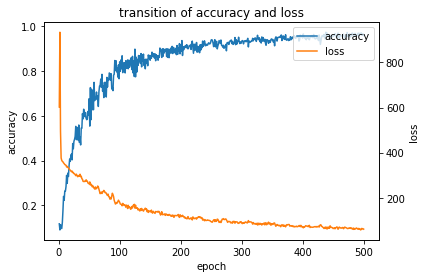

<< noise 18 [%] done >>
<< successfully layers are updated >>
<< noise 19 [%] >>
--------- epoch0 ---------
loss : 876.9522301491186
accuracy : 0.09282178217821782
time : 0.0017881393432617188 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.7778301239013672 [sec]
Train set accuracy : 0.9680772086117297


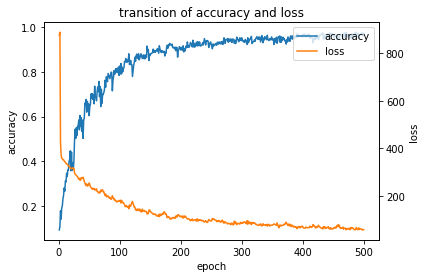

<< noise 19 [%] done >>
<< successfully layers are updated >>
<< noise 20 [%] >>
--------- epoch0 ---------
loss : 717.9013963847709
accuracy : 0.10148514851485149
time : 0.0015859603881835938 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.6487140655517578 [sec]
Train set accuracy : 0.9487750556792873


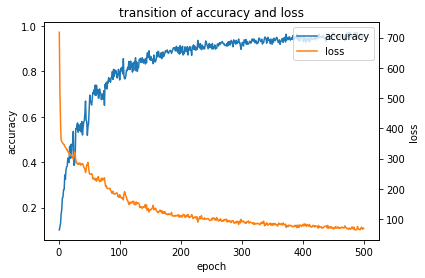

<< noise 20 [%] done >>
<< successfully layers are updated >>
<< noise 21 [%] >>
--------- epoch0 ---------
loss : 535.8164878163914
accuracy : 0.05693069306930693
time : 0.0016651153564453125 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.6914091110229492 [sec]
Train set accuracy : 0.9710467706013363


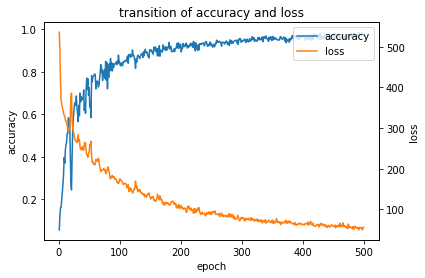

<< noise 21 [%] done >>
<< successfully layers are updated >>
<< noise 22 [%] >>
--------- epoch0 ---------
loss : 903.2250873938874
accuracy : 0.12623762376237624
time : 0.0014100074768066406 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.6485569477081299 [sec]
Train set accuracy : 0.9695619896065331


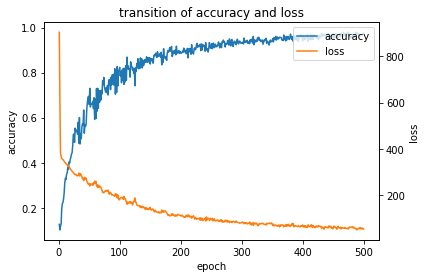

<< noise 22 [%] done >>
<< successfully layers are updated >>
<< noise 23 [%] >>
--------- epoch0 ---------
loss : 846.5955962217911
accuracy : 0.15594059405940594
time : 0.0016591548919677734 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.6151540279388428 [sec]
Train set accuracy : 0.9524870081662955


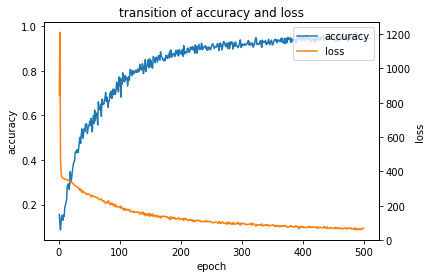

<< noise 23 [%] done >>
<< successfully layers are updated >>
<< noise 24 [%] >>
--------- epoch0 ---------
loss : 587.5856605445935
accuracy : 0.0891089108910891
time : 0.0014770030975341797 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.6785368919372559 [sec]
Train set accuracy : 0.9561989606533037


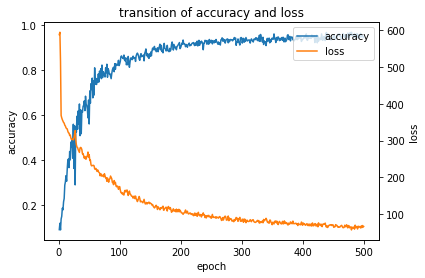

<< noise 24 [%] done >>
<< successfully layers are updated >>
<< noise 25 [%] >>
--------- epoch0 ---------
loss : 535.4816760592544
accuracy : 0.06435643564356436
time : 0.0014879703521728516 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.7164170742034912 [sec]
Train set accuracy : 0.9547141796585004


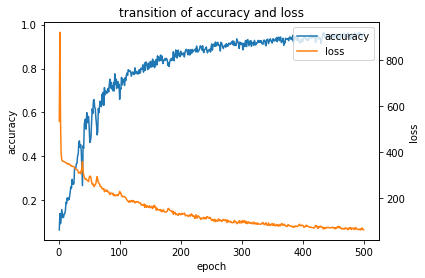

<< noise 25 [%] done >>
<< successfully layers are updated >>
<< noise 26 [%] >>
--------- epoch0 ---------
loss : 681.5006076889581
accuracy : 0.06311881188118812
time : 0.001444101333618164 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.6460859775543213 [sec]
Train set accuracy : 0.9398663697104677


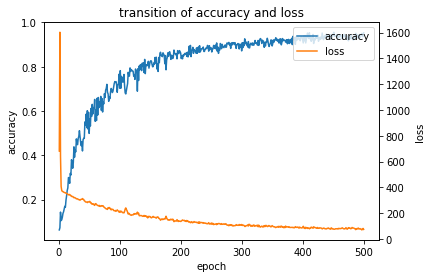

<< noise 26 [%] done >>
<< successfully layers are updated >>
<< noise 27 [%] >>
--------- epoch0 ---------
loss : 610.1002319971146
accuracy : 0.07920792079207921
time : 0.001528024673461914 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.7608811855316162 [sec]
Train set accuracy : 0.9569413511507052


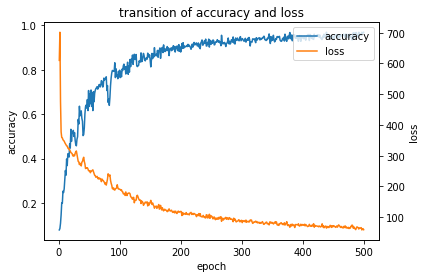

<< noise 27 [%] done >>
<< successfully layers are updated >>
<< noise 28 [%] >>
--------- epoch0 ---------
loss : 594.1194542731247
accuracy : 0.1547029702970297
time : 0.0015869140625 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 1.763174057006836 [sec]
Train set accuracy : 0.9354120267260579


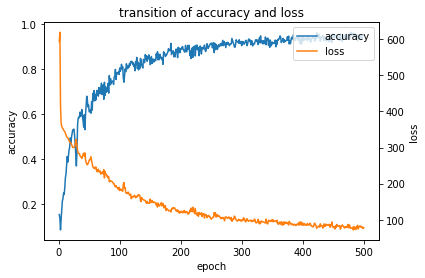

<< noise 28 [%] done >>
<< successfully layers are updated >>
<< noise 29 [%] >>
--------- epoch0 ---------
loss : 750.613391837335
accuracy : 0.07178217821782178
time : 0.0015149116516113281 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 2.2743029594421387 [sec]
Train set accuracy : 0.9391239792130661


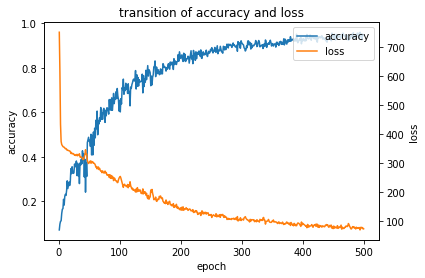

<< noise 29 [%] done >>


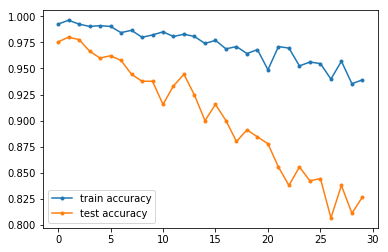

<< successfully layers are updated >>
<< noise 0 [%] >>
--------- epoch0 ---------
loss : 851.0338009102766
accuracy : 0.1188118811881188
time : 0.0062408447265625 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.2967147827148438 [sec]
Train set accuracy : 0.9992576095025983


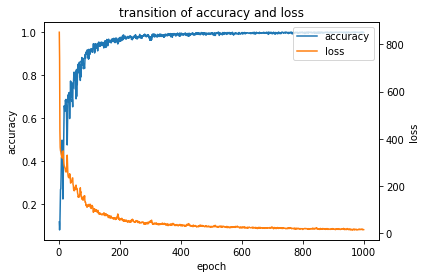

<< noise 0 [%] done >>
<< successfully layers are updated >>
<< noise 1 [%] >>
--------- epoch0 ---------
loss : 496.64369225302653
accuracy : 0.13242574257425743
time : 0.001300811767578125 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.339061975479126 [sec]
Train set accuracy : 0.9992576095025983


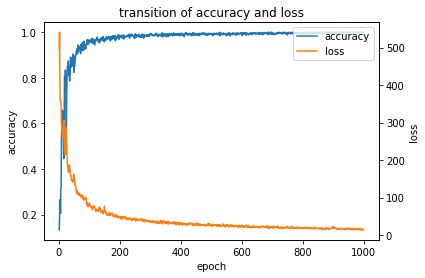

<< noise 1 [%] done >>
<< successfully layers are updated >>
<< noise 2 [%] >>
--------- epoch0 ---------
loss : 567.8734842985258
accuracy : 0.1188118811881188
time : 0.0013360977172851562 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.5106589794158936 [sec]
Train set accuracy : 0.9977728285077951


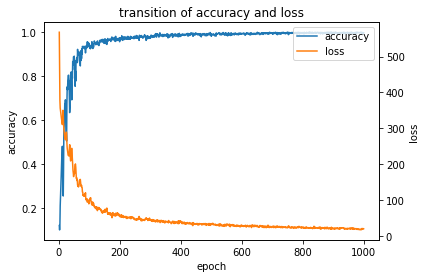

<< noise 2 [%] done >>
<< successfully layers are updated >>
<< noise 3 [%] >>
--------- epoch0 ---------
loss : 793.837262020532
accuracy : 0.12128712871287128
time : 0.0013859272003173828 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.4396278858184814 [sec]
Train set accuracy : 0.9992576095025983


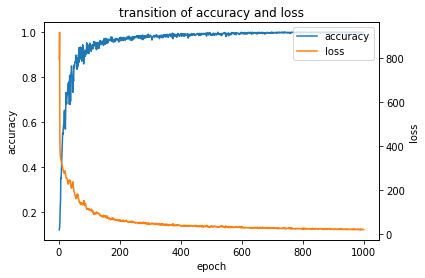

<< noise 3 [%] done >>
<< successfully layers are updated >>
<< noise 4 [%] >>
--------- epoch0 ---------
loss : 563.9033481991175
accuracy : 0.0952970297029703
time : 0.0013041496276855469 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.29768705368042 [sec]
Train set accuracy : 0.9970304380103935


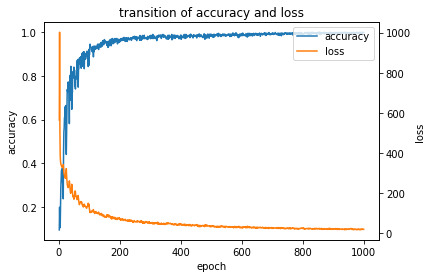

<< noise 4 [%] done >>
<< successfully layers are updated >>
<< noise 5 [%] >>
--------- epoch0 ---------
loss : 506.8241320543175
accuracy : 0.10148514851485149
time : 0.0016770362854003906 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.396358013153076 [sec]
Train set accuracy : 0.9977728285077951


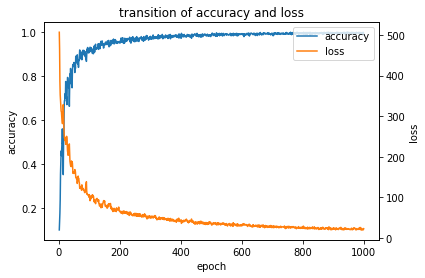

<< noise 5 [%] done >>
<< successfully layers are updated >>
<< noise 6 [%] >>
--------- epoch0 ---------
loss : 998.8017456512762
accuracy : 0.13985148514851486
time : 0.0037338733673095703 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.266925811767578 [sec]
Train set accuracy : 0.9948032665181886


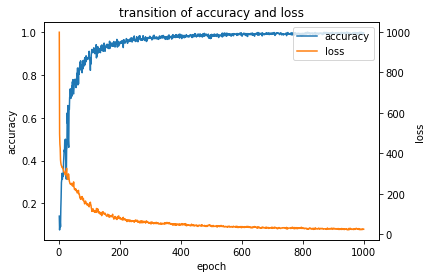

<< noise 6 [%] done >>
<< successfully layers are updated >>
<< noise 7 [%] >>
--------- epoch0 ---------
loss : 923.7508101312715
accuracy : 0.13366336633663367
time : 0.001940011978149414 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.3810269832611084 [sec]
Train set accuracy : 0.9925760950259837


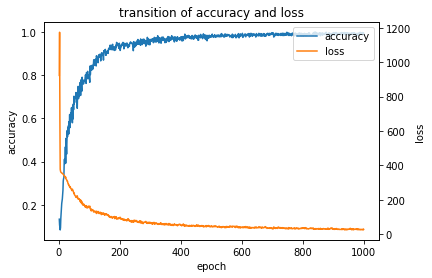

<< noise 7 [%] done >>
<< successfully layers are updated >>
<< noise 8 [%] >>
--------- epoch0 ---------
loss : 489.8100706244612
accuracy : 0.1311881188118812
time : 0.0015130043029785156 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.8074820041656494 [sec]
Train set accuracy : 0.9970304380103935


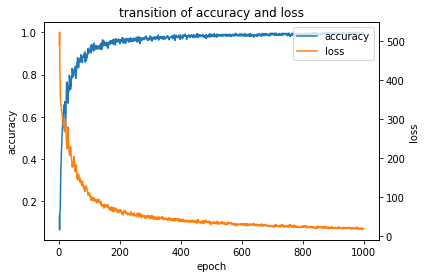

<< noise 8 [%] done >>
<< successfully layers are updated >>
<< noise 9 [%] >>
--------- epoch0 ---------
loss : 608.3818860453799
accuracy : 0.1670792079207921
time : 0.0015010833740234375 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.391206979751587 [sec]
Train set accuracy : 0.991833704528582


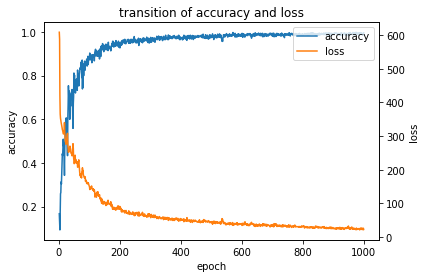

<< noise 9 [%] done >>
<< successfully layers are updated >>
<< noise 10 [%] >>
--------- epoch0 ---------
loss : 504.6796499648367
accuracy : 0.11138613861386139
time : 0.0014579296112060547 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.5781660079956055 [sec]
Train set accuracy : 0.9925760950259837


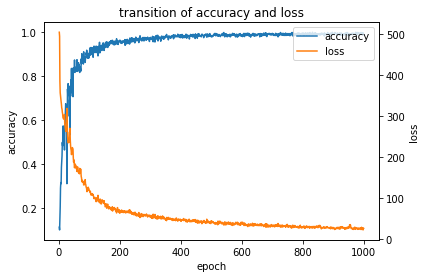

<< noise 10 [%] done >>
<< successfully layers are updated >>
<< noise 11 [%] >>
--------- epoch0 ---------
loss : 656.4550993751756
accuracy : 0.09653465346534654
time : 0.00168609619140625 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.353182077407837 [sec]
Train set accuracy : 0.9910913140311804


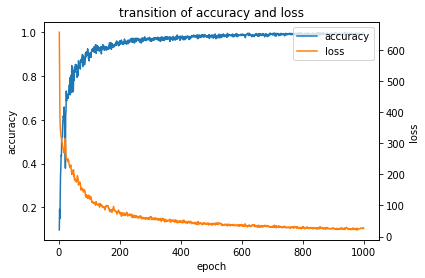

<< noise 11 [%] done >>
<< successfully layers are updated >>
<< noise 12 [%] >>
--------- epoch0 ---------
loss : 1200.4592388424535
accuracy : 0.08663366336633663
time : 0.0014581680297851562 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.0782651901245117 [sec]
Train set accuracy : 0.9888641425389755


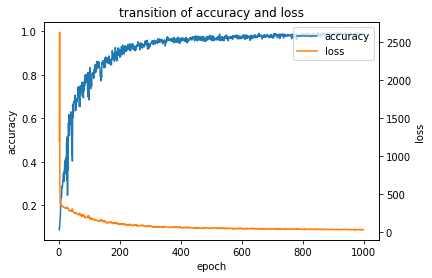

<< noise 12 [%] done >>
<< successfully layers are updated >>
<< noise 13 [%] >>
--------- epoch0 ---------
loss : 561.0343069411558
accuracy : 0.10272277227722772
time : 0.0017199516296386719 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.299076795578003 [sec]
Train set accuracy : 0.9903489235337788


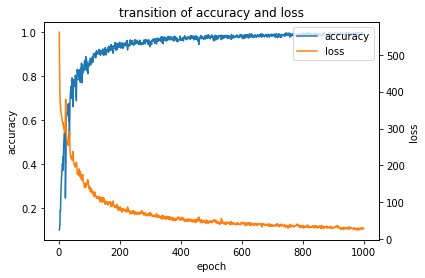

<< noise 13 [%] done >>
<< successfully layers are updated >>
<< noise 14 [%] >>
--------- epoch0 ---------
loss : 767.1188563897904
accuracy : 0.10891089108910891
time : 0.0013489723205566406 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.61372709274292 [sec]
Train set accuracy : 0.994060876020787


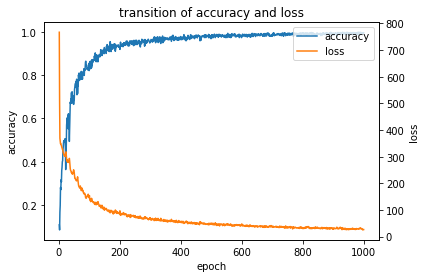

<< noise 14 [%] done >>
<< successfully layers are updated >>
<< noise 15 [%] >>
--------- epoch0 ---------
loss : 732.5880184226774
accuracy : 0.10148514851485149
time : 0.0016908645629882812 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.239480972290039 [sec]
Train set accuracy : 0.9881217520415738


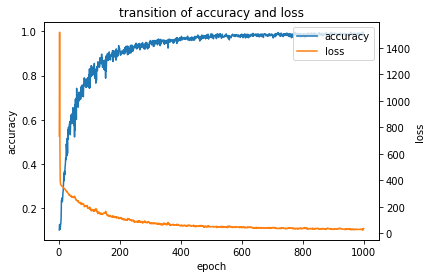

<< noise 15 [%] done >>
<< successfully layers are updated >>
<< noise 16 [%] >>
--------- epoch0 ---------
loss : 618.716599942715
accuracy : 0.10643564356435643
time : 0.0015900135040283203 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 4.7455198764801025 [sec]
Train set accuracy : 0.994060876020787


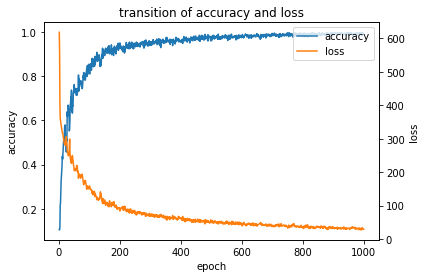

<< noise 16 [%] done >>
<< successfully layers are updated >>
<< noise 17 [%] >>
--------- epoch0 ---------
loss : 568.958967958261
accuracy : 0.06683168316831684
time : 0.0020630359649658203 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.50746488571167 [sec]
Train set accuracy : 0.9903489235337788


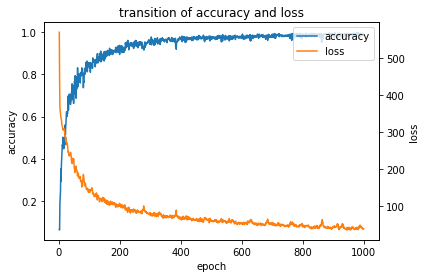

<< noise 17 [%] done >>
<< successfully layers are updated >>
<< noise 18 [%] >>
--------- epoch0 ---------
loss : 532.1804648646133
accuracy : 0.12623762376237624
time : 0.0013120174407958984 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.4338090419769287 [sec]
Train set accuracy : 0.9873793615441723


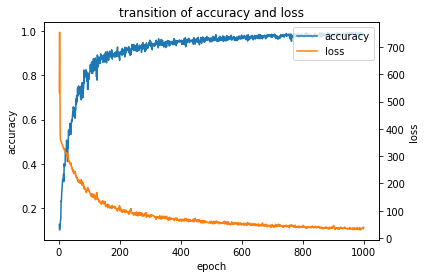

<< noise 18 [%] done >>
<< successfully layers are updated >>
<< noise 19 [%] >>
--------- epoch0 ---------
loss : 697.5648079473192
accuracy : 0.0594059405940594
time : 0.0017490386962890625 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.3842570781707764 [sec]
Train set accuracy : 0.9896065330363771


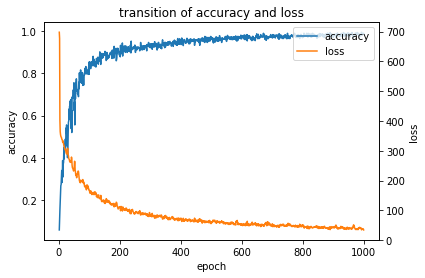

<< noise 19 [%] done >>
<< successfully layers are updated >>
<< noise 20 [%] >>
--------- epoch0 ---------
loss : 829.3367640724824
accuracy : 0.11014851485148515
time : 0.001355886459350586 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.35660982131958 [sec]
Train set accuracy : 0.9910913140311804


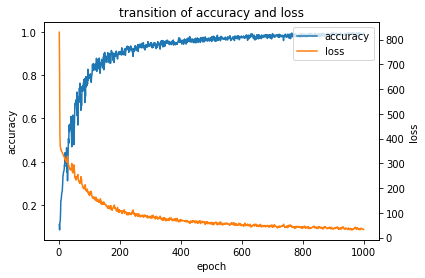

<< noise 20 [%] done >>
<< successfully layers are updated >>
<< noise 21 [%] >>
--------- epoch0 ---------
loss : 664.964072641399
accuracy : 0.12252475247524752
time : 0.002006053924560547 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.4172120094299316 [sec]
Train set accuracy : 0.9836674090571641


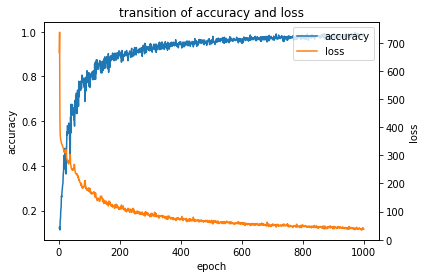

<< noise 21 [%] done >>
<< successfully layers are updated >>
<< noise 22 [%] >>
--------- epoch0 ---------
loss : 744.3079740585679
accuracy : 0.09405940594059406
time : 0.0014438629150390625 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.377415895462036 [sec]
Train set accuracy : 0.9873793615441723


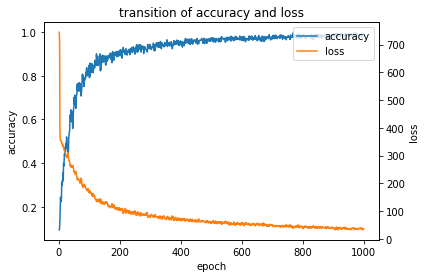

<< noise 22 [%] done >>
<< successfully layers are updated >>
<< noise 23 [%] >>
--------- epoch0 ---------
loss : 728.117571925026
accuracy : 0.07178217821782178
time : 0.0017900466918945312 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.2136831283569336 [sec]
Train set accuracy : 0.9769858945805494


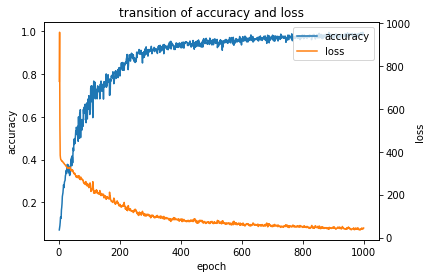

<< noise 23 [%] done >>
<< successfully layers are updated >>
<< noise 24 [%] >>
--------- epoch0 ---------
loss : 567.8979617653929
accuracy : 0.08787128712871287
time : 0.0013380050659179688 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.9688501358032227 [sec]
Train set accuracy : 0.9844097995545658


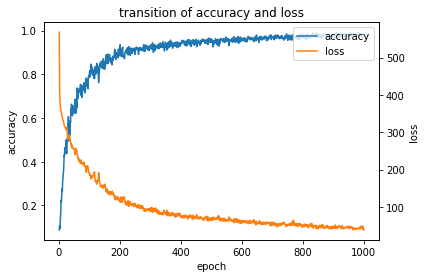

<< noise 24 [%] done >>
<< successfully layers are updated >>
<< noise 25 [%] >>
--------- epoch0 ---------
loss : 523.9349077529287
accuracy : 0.06311881188118812
time : 0.0017459392547607422 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.3623669147491455 [sec]
Train set accuracy : 0.9792130660727543


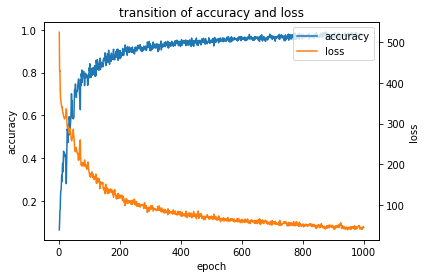

<< noise 25 [%] done >>
<< successfully layers are updated >>
<< noise 26 [%] >>
--------- epoch0 ---------
loss : 594.8423555401878
accuracy : 0.09282178217821782
time : 0.0015289783477783203 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.4143099784851074 [sec]
Train set accuracy : 0.9836674090571641


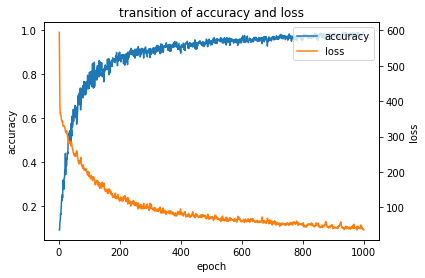

<< noise 26 [%] done >>
<< successfully layers are updated >>
<< noise 27 [%] >>
--------- epoch0 ---------
loss : 634.8764046276767
accuracy : 0.08663366336633663
time : 0.001538991928100586 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.6159558296203613 [sec]
Train set accuracy : 0.9873793615441723


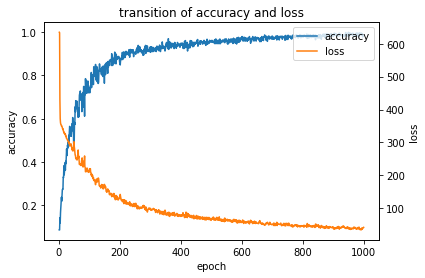

<< noise 27 [%] done >>
<< successfully layers are updated >>
<< noise 28 [%] >>
--------- epoch0 ---------
loss : 498.19725439702427
accuracy : 0.12871287128712872
time : 0.0014791488647460938 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.436598062515259 [sec]
Train set accuracy : 0.9829250185597624


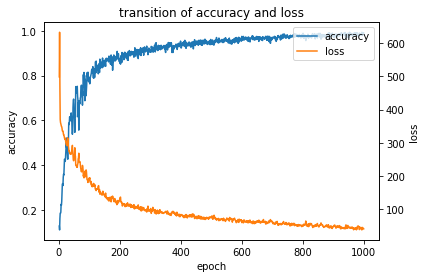

<< noise 28 [%] done >>
<< successfully layers are updated >>
<< noise 29 [%] >>
--------- epoch0 ---------
loss : 608.2368752556636
accuracy : 0.06311881188118812
time : 0.0014269351959228516 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 3.3237180709838867 [sec]
Train set accuracy : 0.9762435040831478


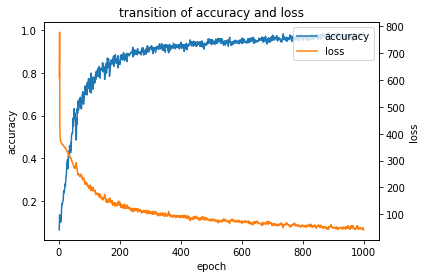

<< noise 29 [%] done >>


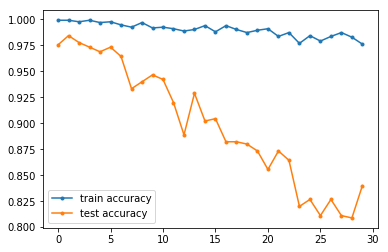

<< successfully layers are updated >>
<< noise 0 [%] >>
--------- epoch0 ---------
loss : 725.4727795506916
accuracy : 0.02599009900990099
time : 0.0018510818481445312 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 16.870496034622192 [sec]
Train set accuracy : 1.0


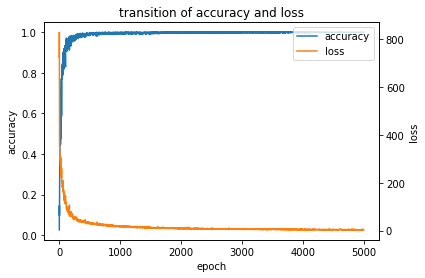

<< noise 0 [%] done >>
<< successfully layers are updated >>
<< noise 1 [%] >>
--------- epoch0 ---------
loss : 560.6074848997059
accuracy : 0.17202970297029702
time : 0.0013949871063232422 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 16.41144609451294 [sec]
Train set accuracy : 1.0


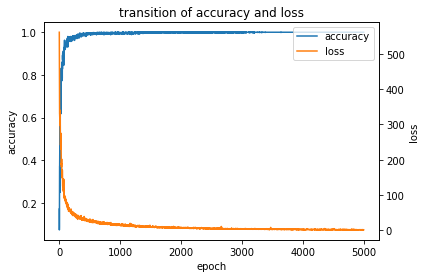

<< noise 1 [%] done >>
<< successfully layers are updated >>
<< noise 2 [%] >>
--------- epoch0 ---------
loss : 810.4220821241195
accuracy : 0.1150990099009901
time : 0.0016410350799560547 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 17.010087966918945 [sec]
Train set accuracy : 1.0


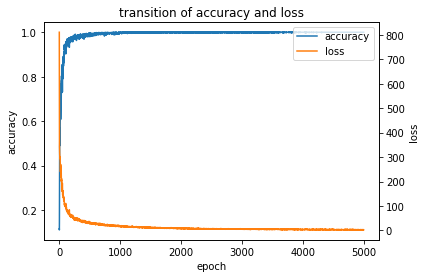

<< noise 2 [%] done >>
<< successfully layers are updated >>
<< noise 3 [%] >>
--------- epoch0 ---------
loss : 490.79783248981255
accuracy : 0.14232673267326731
time : 0.0015790462493896484 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 16.777554988861084 [sec]
Train set accuracy : 1.0


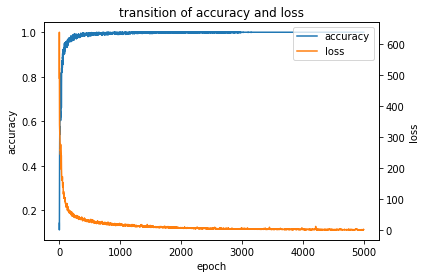

<< noise 3 [%] done >>
<< successfully layers are updated >>
<< noise 4 [%] >>
--------- epoch0 ---------
loss : 622.487394457656
accuracy : 0.09900990099009901
time : 0.001711130142211914 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 17.212228059768677 [sec]
Train set accuracy : 0.9992576095025983


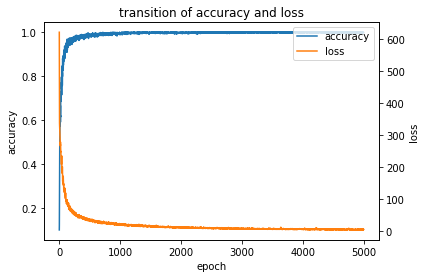

<< noise 4 [%] done >>
<< successfully layers are updated >>
<< noise 5 [%] >>
--------- epoch0 ---------
loss : 824.176007724973
accuracy : 0.10891089108910891
time : 0.0018279552459716797 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 16.06647491455078 [sec]
Train set accuracy : 1.0


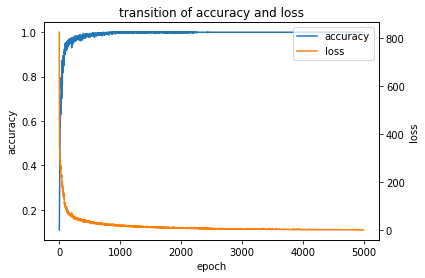

<< noise 5 [%] done >>
<< successfully layers are updated >>
<< noise 6 [%] >>
--------- epoch0 ---------
loss : 778.6519843495959
accuracy : 0.0952970297029703
time : 0.00168609619140625 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 16.82178020477295 [sec]
Train set accuracy : 1.0


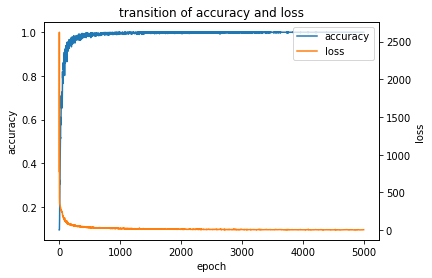

<< noise 6 [%] done >>
<< successfully layers are updated >>
<< noise 7 [%] >>
--------- epoch0 ---------
loss : 983.9853152859994
accuracy : 0.12004950495049505
time : 0.0014879703521728516 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 15.982139825820923 [sec]
Train set accuracy : 0.9985152190051967


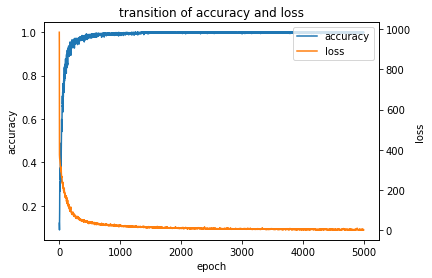

<< noise 7 [%] done >>
<< successfully layers are updated >>
<< noise 8 [%] >>
--------- epoch0 ---------
loss : 521.9039962619063
accuracy : 0.06930693069306931
time : 0.0016350746154785156 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 17.533313035964966 [sec]
Train set accuracy : 1.0


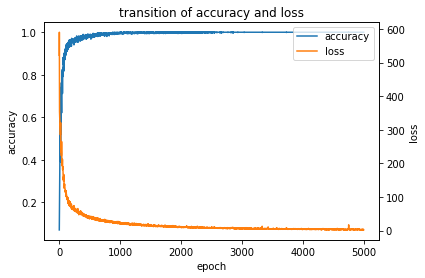

<< noise 8 [%] done >>
<< successfully layers are updated >>
<< noise 9 [%] >>
--------- epoch0 ---------
loss : 566.4979957648247
accuracy : 0.07549504950495049
time : 0.0014710426330566406 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 17.062633991241455 [sec]
Train set accuracy : 0.9992576095025983


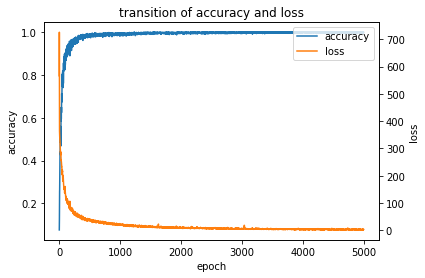

<< noise 9 [%] done >>
<< successfully layers are updated >>
<< noise 10 [%] >>
--------- epoch0 ---------
loss : 727.2845054808336
accuracy : 0.0655940594059406
time : 0.0016829967498779297 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 16.761258840560913 [sec]
Train set accuracy : 1.0


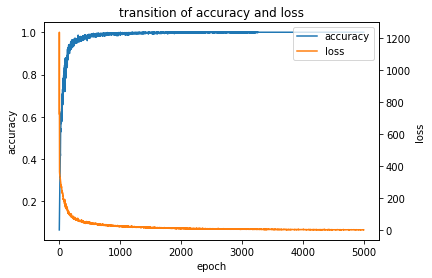

<< noise 10 [%] done >>
<< successfully layers are updated >>
<< noise 11 [%] >>
--------- epoch0 ---------
loss : 484.3709511983347
accuracy : 0.10148514851485149
time : 0.0018579959869384766 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 17.093256950378418 [sec]
Train set accuracy : 0.9985152190051967


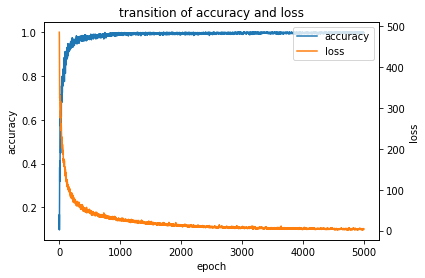

<< noise 11 [%] done >>
<< successfully layers are updated >>
<< noise 12 [%] >>
--------- epoch0 ---------
loss : 703.8927743413519
accuracy : 0.10148514851485149
time : 0.0017139911651611328 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 16.409120082855225 [sec]
Train set accuracy : 0.9985152190051967


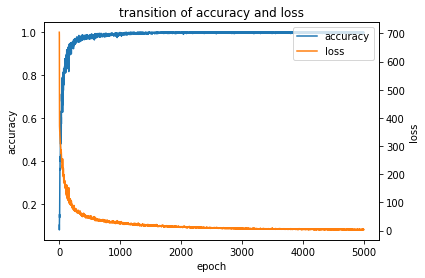

<< noise 12 [%] done >>
<< successfully layers are updated >>
<< noise 13 [%] >>
--------- epoch0 ---------
loss : 876.6530001685771
accuracy : 0.11262376237623763
time : 0.0014979839324951172 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 16.580806970596313 [sec]
Train set accuracy : 1.0


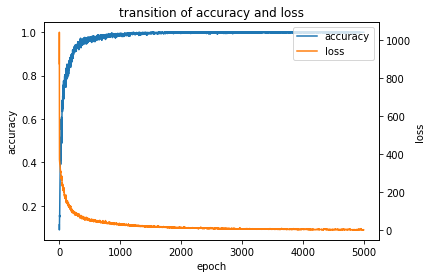

<< noise 13 [%] done >>
<< successfully layers are updated >>
<< noise 14 [%] >>
--------- epoch0 ---------
loss : 929.0868850426622
accuracy : 0.1373762376237624
time : 0.0017390251159667969 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 16.339537143707275 [sec]
Train set accuracy : 1.0


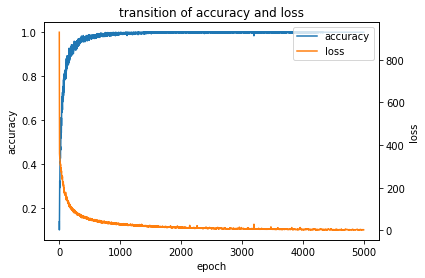

<< noise 14 [%] done >>
<< successfully layers are updated >>
<< noise 15 [%] >>
--------- epoch0 ---------
loss : 580.0783217055452
accuracy : 0.1349009900990099
time : 0.0016829967498779297 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 17.65368390083313 [sec]
Train set accuracy : 0.9985152190051967


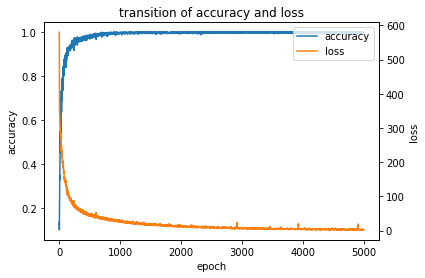

<< noise 15 [%] done >>
<< successfully layers are updated >>
<< noise 16 [%] >>
--------- epoch0 ---------
loss : 533.6148539729274
accuracy : 0.10024752475247525
time : 0.0017099380493164062 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 16.487514972686768 [sec]
Train set accuracy : 1.0


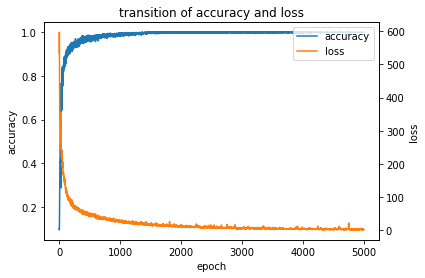

<< noise 16 [%] done >>
<< successfully layers are updated >>
<< noise 17 [%] >>
--------- epoch0 ---------
loss : 746.0491548853149
accuracy : 0.08292079207920793
time : 0.0016009807586669922 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 17.111945867538452 [sec]
Train set accuracy : 0.9977728285077951


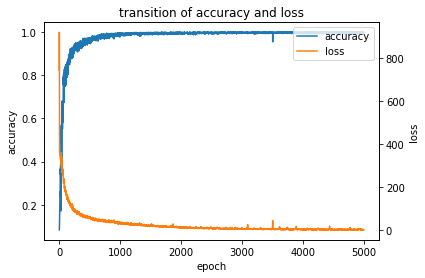

<< noise 17 [%] done >>
<< successfully layers are updated >>
<< noise 18 [%] >>
--------- epoch0 ---------
loss : 1016.2768508936006
accuracy : 0.08663366336633663
time : 0.0017790794372558594 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 15.779726028442383 [sec]
Train set accuracy : 1.0


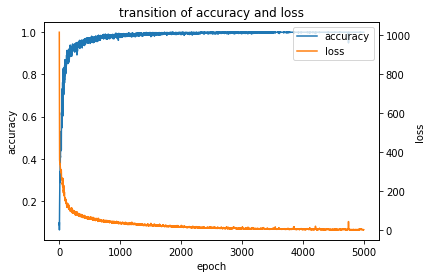

<< noise 18 [%] done >>
<< successfully layers are updated >>
<< noise 19 [%] >>
--------- epoch0 ---------
loss : 520.4136555577293
accuracy : 0.07549504950495049
time : 0.0017910003662109375 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 17.479403972625732 [sec]
Train set accuracy : 0.9977728285077951


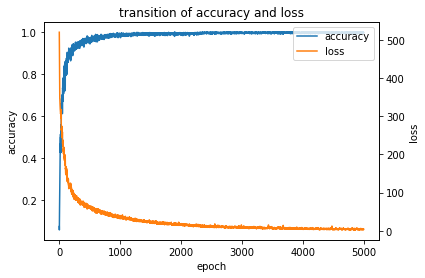

<< noise 19 [%] done >>
<< successfully layers are updated >>
<< noise 20 [%] >>
--------- epoch0 ---------
loss : 821.5825280593376
accuracy : 0.08415841584158416
time : 0.0016620159149169922 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 16.13177800178528 [sec]
Train set accuracy : 0.9977728285077951


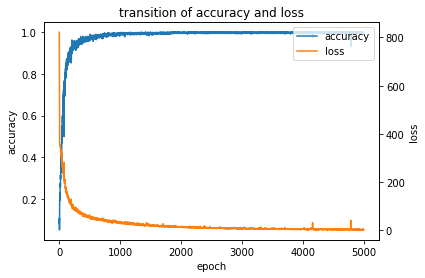

<< noise 20 [%] done >>
<< successfully layers are updated >>
<< noise 21 [%] >>
--------- epoch0 ---------
loss : 558.3415509064839
accuracy : 0.08415841584158416
time : 0.001795053482055664 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 17.407104969024658 [sec]
Train set accuracy : 1.0


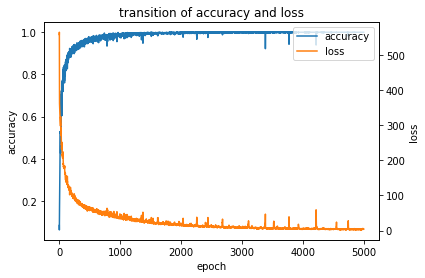

<< noise 21 [%] done >>
<< successfully layers are updated >>
<< noise 22 [%] >>
--------- epoch0 ---------
loss : 598.2536616047103
accuracy : 0.08168316831683169
time : 0.0017650127410888672 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 17.561384201049805 [sec]
Train set accuracy : 1.0


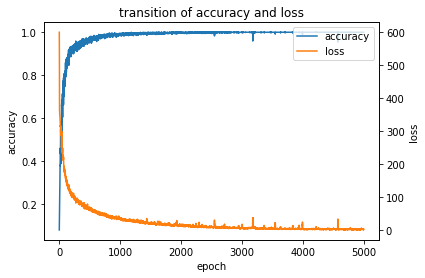

<< noise 22 [%] done >>
<< successfully layers are updated >>
<< noise 23 [%] >>
--------- epoch0 ---------
loss : 577.2823653896992
accuracy : 0.08292079207920793
time : 0.0020711421966552734 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 16.769978046417236 [sec]
Train set accuracy : 0.9970304380103935


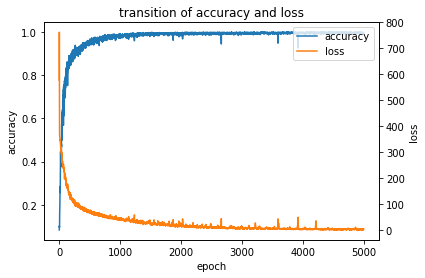

<< noise 23 [%] done >>
<< successfully layers are updated >>
<< noise 24 [%] >>
--------- epoch0 ---------
loss : 579.3113201293918
accuracy : 0.0853960396039604
time : 0.0016090869903564453 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 17.609397172927856 [sec]
Train set accuracy : 0.9970304380103935


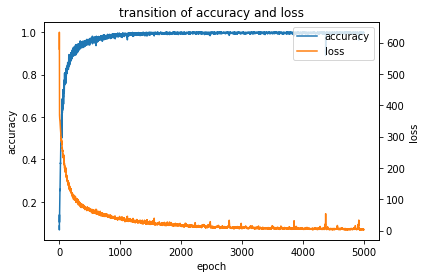

<< noise 24 [%] done >>
<< successfully layers are updated >>
<< noise 25 [%] >>
--------- epoch0 ---------
loss : 830.0347004762989
accuracy : 0.07425742574257425
time : 0.0017011165618896484 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 15.379281997680664 [sec]
Train set accuracy : 0.9933184855233853


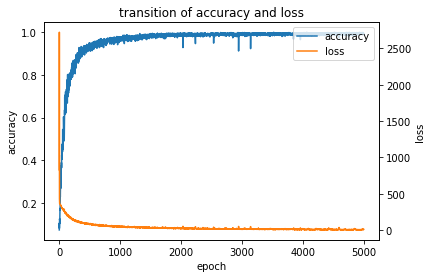

<< noise 25 [%] done >>
<< successfully layers are updated >>
<< noise 26 [%] >>
--------- epoch0 ---------
loss : 504.60425640120957
accuracy : 0.08044554455445545
time : 0.0020630359649658203 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 17.426118850708008 [sec]
Train set accuracy : 0.9992576095025983


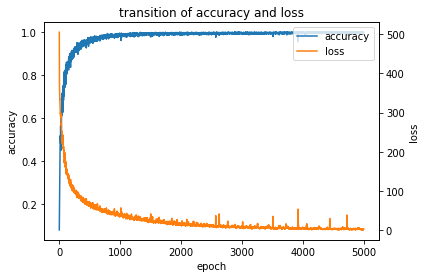

<< noise 26 [%] done >>
<< successfully layers are updated >>
<< noise 27 [%] >>
--------- epoch0 ---------
loss : 628.4001996271217
accuracy : 0.09034653465346534
time : 0.001531839370727539 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 16.925768852233887 [sec]
Train set accuracy : 0.9962880475129918


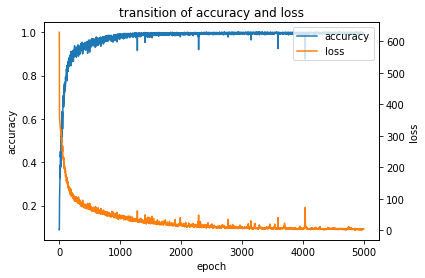

<< noise 27 [%] done >>
<< successfully layers are updated >>
<< noise 28 [%] >>
--------- epoch0 ---------
loss : 507.2559398616783
accuracy : 0.11757425742574257
time : 0.0016341209411621094 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 17.296672105789185 [sec]
Train set accuracy : 0.9992576095025983


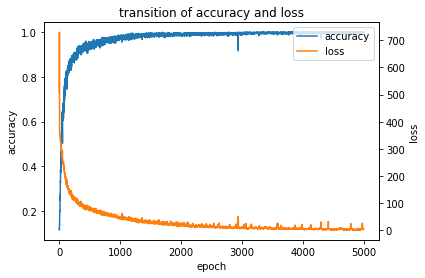

<< noise 28 [%] done >>
<< successfully layers are updated >>
<< noise 29 [%] >>
--------- epoch0 ---------
loss : 786.3192815838775
accuracy : 0.07797029702970297
time : 0.0016279220581054688 [sec]
--------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 16.356252908706665 [sec]
Train set accuracy : 0.9933184855233853


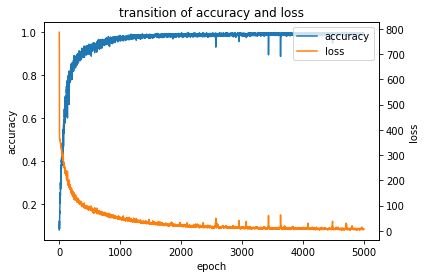

<< noise 29 [%] done >>


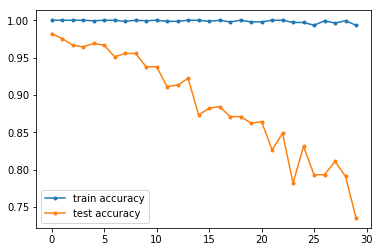

<< successfully layers are updated >>
<< noise 0 [%] >>
--------- epoch0 ---------
loss : 498.08103852953457
accuracy : 0.1311881188118812
time : 0.003854990005493164 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.5250647300734013
accuracy : 1.0
time : 17.42309308052063 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 33.99503302574158 [sec]
Train set accuracy : 1.0


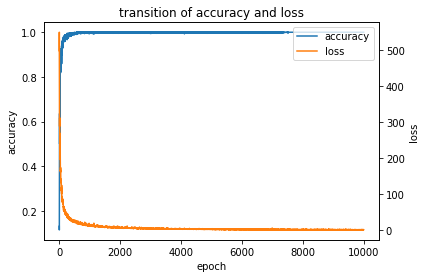

<< noise 0 [%] done >>
<< successfully layers are updated >>
<< noise 1 [%] >>
--------- epoch0 ---------
loss : 649.5521698306043
accuracy : 0.08415841584158416
time : 0.0014050006866455078 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.5110854708060697
accuracy : 1.0
time : 16.763509035110474 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 33.04056096076965 [sec]
Train set accuracy : 1.0


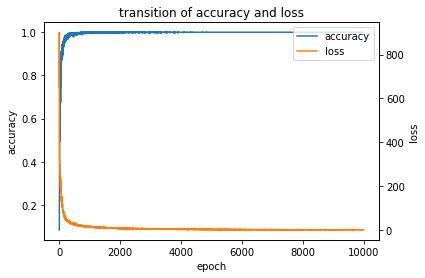

<< noise 1 [%] done >>
<< successfully layers are updated >>
<< noise 2 [%] >>
--------- epoch0 ---------
loss : 1027.7723083734322
accuracy : 0.05198019801980198
time : 0.0015859603881835938 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.611589313580724
accuracy : 1.0
time : 15.762356042861938 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 32.30013394355774 [sec]
Train set accuracy : 1.0


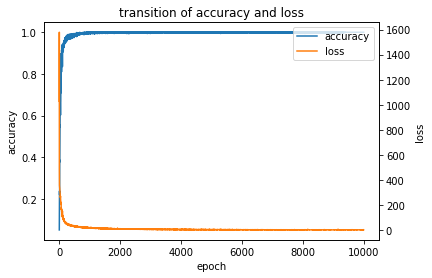

<< noise 2 [%] done >>
<< successfully layers are updated >>
<< noise 3 [%] >>
--------- epoch0 ---------
loss : 502.241416453111
accuracy : 0.09158415841584158
time : 0.002111196517944336 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.801896464776334
accuracy : 1.0
time : 16.50703001022339 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 33.06696105003357 [sec]
Train set accuracy : 1.0


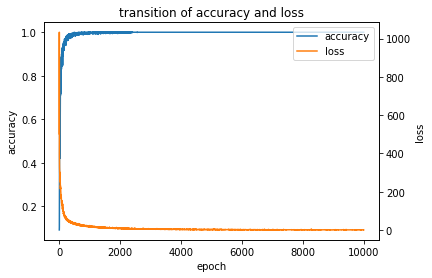

<< noise 3 [%] done >>
<< successfully layers are updated >>
<< noise 4 [%] >>
--------- epoch0 ---------
loss : 582.2783996833907
accuracy : 0.11633663366336634
time : 0.001508951187133789 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.0137696214105762
accuracy : 1.0
time : 16.844587087631226 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 33.32880711555481 [sec]
Train set accuracy : 1.0


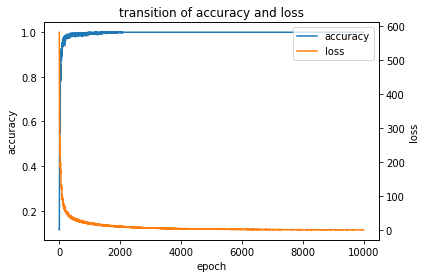

<< noise 4 [%] done >>
<< successfully layers are updated >>
<< noise 5 [%] >>
--------- epoch0 ---------
loss : 504.9576527793248
accuracy : 0.14356435643564355
time : 0.0013129711151123047 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.3636187390031145
accuracy : 0.9987623762376238
time : 16.1273090839386 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 32.55900812149048 [sec]
Train set accuracy : 0.9992576095025983


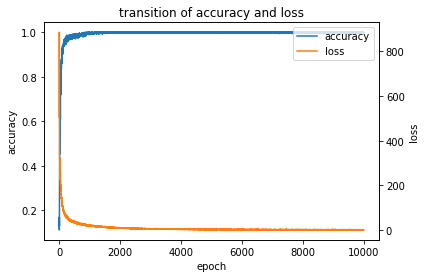

<< noise 5 [%] done >>
<< successfully layers are updated >>
<< noise 6 [%] >>
--------- epoch0 ---------
loss : 570.1642507628583
accuracy : 0.0891089108910891
time : 0.001600027084350586 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.29406740299295
accuracy : 0.995049504950495
time : 16.449058055877686 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 33.15438914299011 [sec]
Train set accuracy : 0.9992576095025983


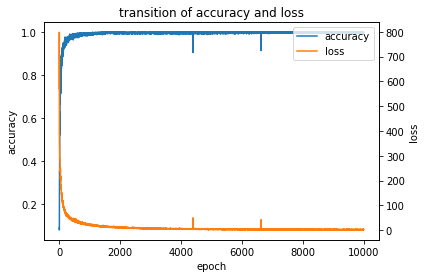

<< noise 6 [%] done >>
<< successfully layers are updated >>
<< noise 7 [%] >>
--------- epoch0 ---------
loss : 657.6022445582289
accuracy : 0.10643564356435643
time : 0.0021860599517822266 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.912610739226121
accuracy : 0.9987623762376238
time : 16.027990102767944 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 32.97458505630493 [sec]
Train set accuracy : 1.0


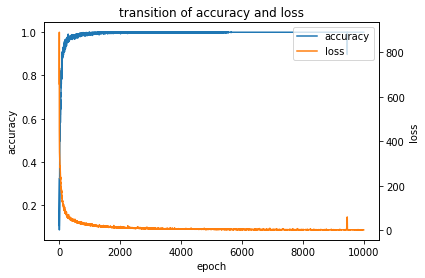

<< noise 7 [%] done >>
<< successfully layers are updated >>
<< noise 8 [%] >>
--------- epoch0 ---------
loss : 689.1819040758444
accuracy : 0.09653465346534654
time : 0.0018379688262939453 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.784641209003239
accuracy : 0.9987623762376238
time : 16.271806955337524 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 33.11754393577576 [sec]
Train set accuracy : 1.0


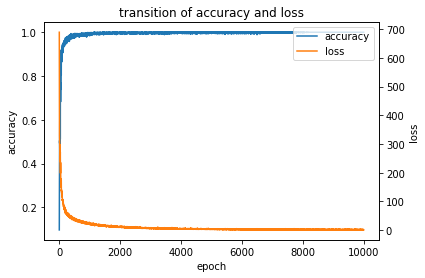

<< noise 8 [%] done >>
<< successfully layers are updated >>
<< noise 9 [%] >>
--------- epoch0 ---------
loss : 741.9924438268984
accuracy : 0.18316831683168316
time : 0.0014958381652832031 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.8399783041232185
accuracy : 0.9987623762376238
time : 15.62056279182434 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 32.34533381462097 [sec]
Train set accuracy : 1.0


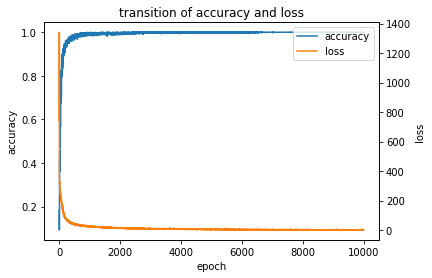

<< noise 9 [%] done >>
<< successfully layers are updated >>
<< noise 10 [%] >>
--------- epoch0 ---------
loss : 576.1802219155345
accuracy : 0.04826732673267327
time : 0.0017161369323730469 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.2508432137381735
accuracy : 0.9987623762376238
time : 16.57391905784607 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 33.71304202079773 [sec]
Train set accuracy : 1.0


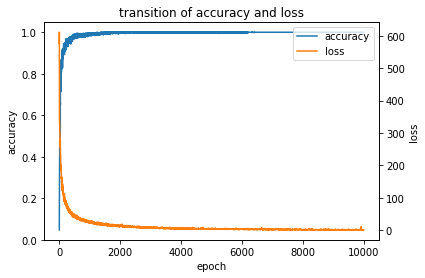

<< noise 10 [%] done >>
<< successfully layers are updated >>
<< noise 11 [%] >>
--------- epoch0 ---------
loss : 573.9025438854505
accuracy : 0.07797029702970297
time : 0.0015628337860107422 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.5406184283914555
accuracy : 1.0
time : 17.783329963684082 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 34.35365891456604 [sec]
Train set accuracy : 1.0


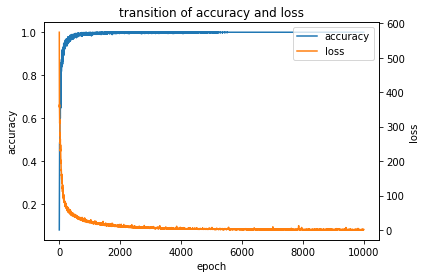

<< noise 11 [%] done >>
<< successfully layers are updated >>
<< noise 12 [%] >>
--------- epoch0 ---------
loss : 665.9871664262598
accuracy : 0.14727722772277227
time : 0.002195119857788086 [sec]
--------------------------

--------- epoch5000 ---------
loss : 5.526903998186709
accuracy : 0.995049504950495
time : 16.68327307701111 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 32.72677302360535 [sec]
Train set accuracy : 0.9992576095025983


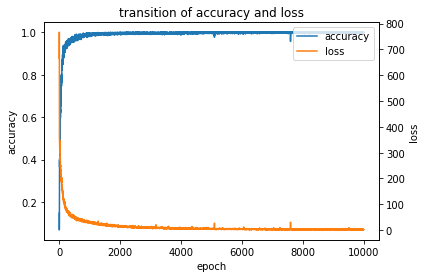

<< noise 12 [%] done >>
<< successfully layers are updated >>
<< noise 13 [%] >>
--------- epoch0 ---------
loss : 594.5410829250553
accuracy : 0.09900990099009901
time : 0.0016260147094726562 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.742894646621832
accuracy : 0.9975247524752475
time : 17.350914001464844 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 33.91419696807861 [sec]
Train set accuracy : 1.0


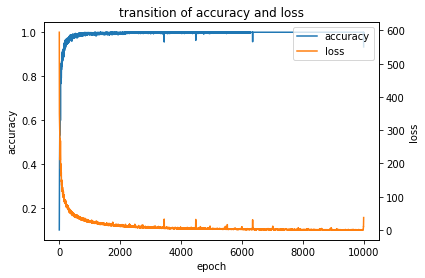

<< noise 13 [%] done >>
<< successfully layers are updated >>
<< noise 14 [%] >>
--------- epoch0 ---------
loss : 538.5262359954495
accuracy : 0.09405940594059406
time : 0.0017418861389160156 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.86479420451802
accuracy : 1.0
time : 18.65965485572815 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 35.31179690361023 [sec]
Train set accuracy : 1.0


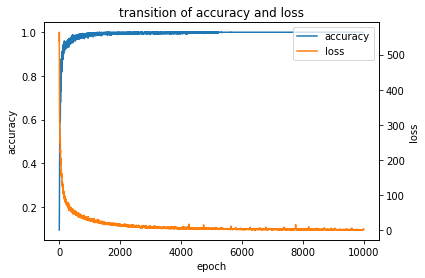

<< noise 14 [%] done >>
<< successfully layers are updated >>
<< noise 15 [%] >>
--------- epoch0 ---------
loss : 608.3800042643952
accuracy : 0.0853960396039604
time : 0.0016939640045166016 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.3132747343921367
accuracy : 0.9962871287128713
time : 17.247406005859375 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 33.38837695121765 [sec]
Train set accuracy : 0.9985152190051967


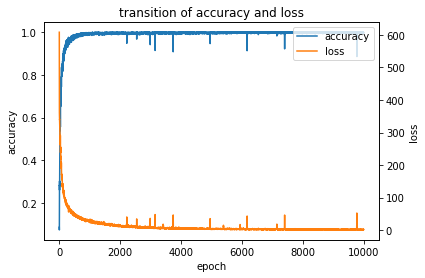

<< noise 15 [%] done >>
<< successfully layers are updated >>
<< noise 16 [%] >>
--------- epoch0 ---------
loss : 1267.883678161144
accuracy : 0.08292079207920793
time : 0.001444101333618164 [sec]
--------------------------

--------- epoch5000 ---------
loss : 6.167053330055232
accuracy : 1.0
time : 16.130962133407593 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 31.17505717277527 [sec]
Train set accuracy : 0.9985152190051967


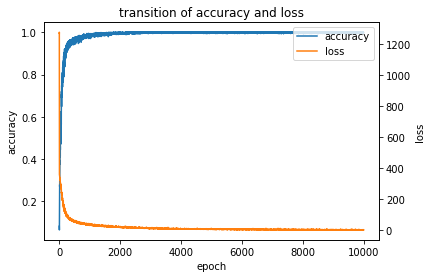

<< noise 16 [%] done >>
<< successfully layers are updated >>
<< noise 17 [%] >>
--------- epoch0 ---------
loss : 735.105653680998
accuracy : 0.09777227722772278
time : 0.0017077922821044922 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.397227666941116
accuracy : 0.9987623762376238
time : 17.52707600593567 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 34.59716796875 [sec]
Train set accuracy : 1.0


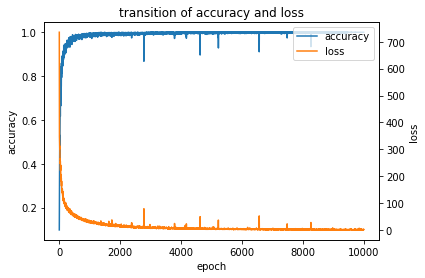

<< noise 17 [%] done >>
<< successfully layers are updated >>
<< noise 18 [%] >>
--------- epoch0 ---------
loss : 698.9225649302846
accuracy : 0.11138613861386139
time : 0.0014438629150390625 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.167824945592924
accuracy : 0.9987623762376238
time : 16.627818822860718 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 33.979755878448486 [sec]
Train set accuracy : 1.0


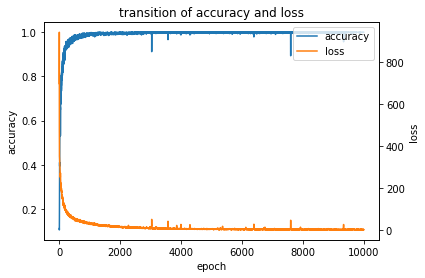

<< noise 18 [%] done >>
<< successfully layers are updated >>
<< noise 19 [%] >>
--------- epoch0 ---------
loss : 778.4255955931145
accuracy : 0.14356435643564355
time : 0.0016810894012451172 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.839670675720372
accuracy : 0.9975247524752475
time : 16.873028993606567 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 33.7924370765686 [sec]
Train set accuracy : 0.9992576095025983


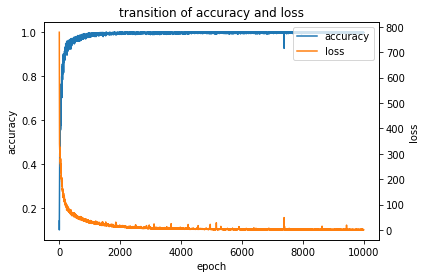

<< noise 19 [%] done >>
<< successfully layers are updated >>
<< noise 20 [%] >>
--------- epoch0 ---------
loss : 831.3409257871967
accuracy : 0.10272277227722772
time : 0.00152587890625 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.7572741352825325
accuracy : 0.9975247524752475
time : 16.312161922454834 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 32.81026887893677 [sec]
Train set accuracy : 0.9985152190051967


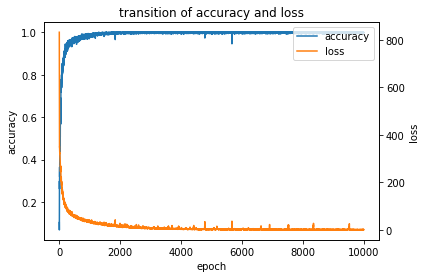

<< noise 20 [%] done >>
<< successfully layers are updated >>
<< noise 21 [%] >>
--------- epoch0 ---------
loss : 541.7332238741405
accuracy : 0.1150990099009901
time : 0.0014350414276123047 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.5201180493507587
accuracy : 1.0
time : 16.837915182113647 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 33.88230013847351 [sec]
Train set accuracy : 1.0


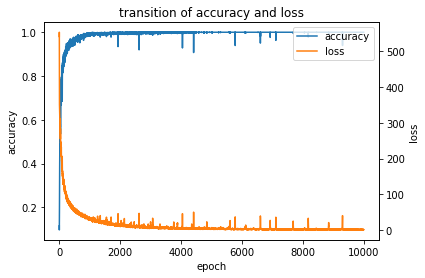

<< noise 21 [%] done >>
<< successfully layers are updated >>
<< noise 22 [%] >>
--------- epoch0 ---------
loss : 619.5181531095068
accuracy : 0.08292079207920793
time : 0.001653909683227539 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.710194314708448
accuracy : 0.9987623762376238
time : 16.985607862472534 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 34.35767984390259 [sec]
Train set accuracy : 1.0


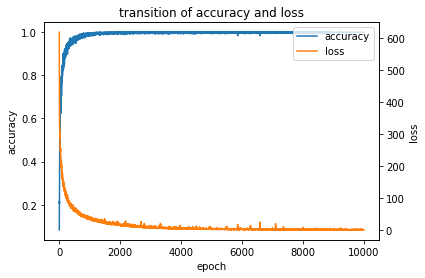

<< noise 22 [%] done >>
<< successfully layers are updated >>
<< noise 23 [%] >>
--------- epoch0 ---------
loss : 557.3471101276662
accuracy : 0.06683168316831684
time : 0.0016460418701171875 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.73347007966255
accuracy : 0.9975247524752475
time : 16.19041895866394 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 32.954946994781494 [sec]
Train set accuracy : 1.0


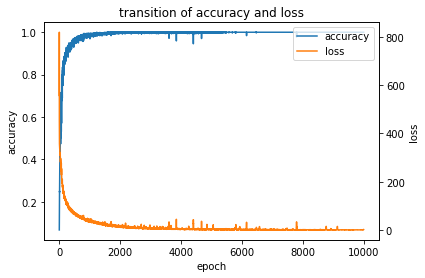

<< noise 23 [%] done >>
<< successfully layers are updated >>
<< noise 24 [%] >>
--------- epoch0 ---------
loss : 861.6065234620014
accuracy : 0.09653465346534654
time : 0.0014920234680175781 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.7384308805524573
accuracy : 0.9962871287128713
time : 16.525618076324463 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 32.692732095718384 [sec]
Train set accuracy : 0.9992576095025983


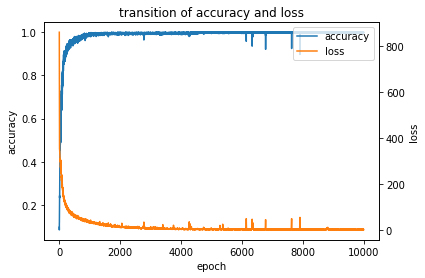

<< noise 24 [%] done >>
<< successfully layers are updated >>
<< noise 25 [%] >>
--------- epoch0 ---------
loss : 790.1340072213941
accuracy : 0.10272277227722772
time : 0.0015358924865722656 [sec]
--------------------------

--------- epoch5000 ---------
loss : 6.614711561211756
accuracy : 0.9962871287128713
time : 16.716498851776123 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 33.64134097099304 [sec]
Train set accuracy : 0.9985152190051967


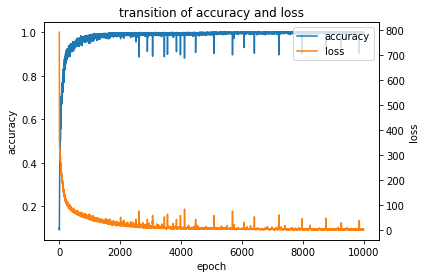

<< noise 25 [%] done >>
<< successfully layers are updated >>
<< noise 26 [%] >>
--------- epoch0 ---------
loss : 657.8694793598326
accuracy : 0.13861386138613863
time : 0.001463174819946289 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.757428192644362
accuracy : 0.9975247524752475
time : 16.9933021068573 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 33.12793207168579 [sec]
Train set accuracy : 0.9985152190051967


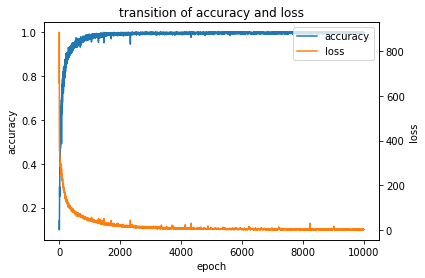

<< noise 26 [%] done >>
<< successfully layers are updated >>
<< noise 27 [%] >>
--------- epoch0 ---------
loss : 586.1071923774748
accuracy : 0.1349009900990099
time : 0.001483917236328125 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.1346199926030796
accuracy : 0.9975247524752475
time : 17.123888969421387 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 33.536473989486694 [sec]
Train set accuracy : 0.9985152190051967


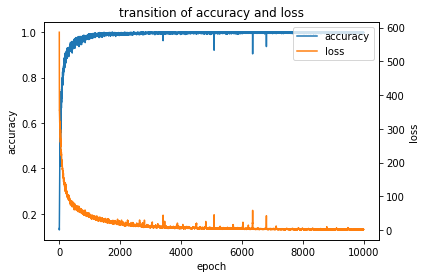

<< noise 27 [%] done >>
<< successfully layers are updated >>
<< noise 28 [%] >>
--------- epoch0 ---------
loss : 514.0637287034216
accuracy : 0.08787128712871287
time : 0.0014579296112060547 [sec]
--------------------------

--------- epoch5000 ---------
loss : 5.461845027415125
accuracy : 0.9962871287128713
time : 17.746039867401123 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 34.00052499771118 [sec]
Train set accuracy : 1.0


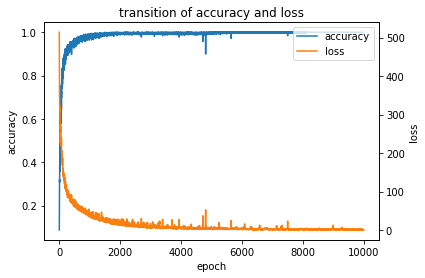

<< noise 28 [%] done >>
<< successfully layers are updated >>
<< noise 29 [%] >>
--------- epoch0 ---------
loss : 523.5698667323682
accuracy : 0.11138613861386139
time : 0.0014791488647460938 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.996401901722117
accuracy : 0.9987623762376238
time : 18.01096510887146 [sec]
-----------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 34.21727204322815 [sec]
Train set accuracy : 0.9977728285077951


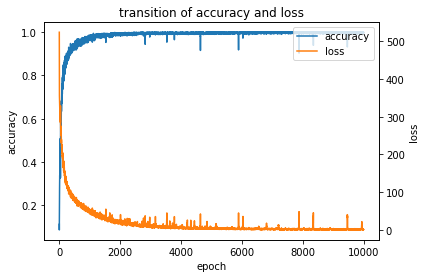

<< noise 29 [%] done >>


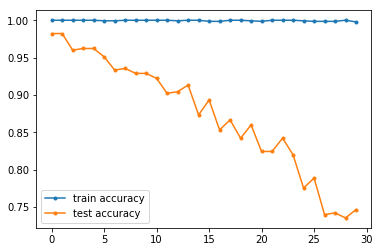

<< successfully layers are updated >>
<< noise 0 [%] >>
--------- epoch0 ---------
loss : 724.3361401990533
accuracy : 0.0594059405940594
time : 0.0026509761810302734 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.7605439941061385
accuracy : 1.0
time : 16.70381784439087 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.2704585940504534
accuracy : 1.0
time : 32.87617588043213 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 48.752442836761475 [sec]
Train set accuracy : 1.0


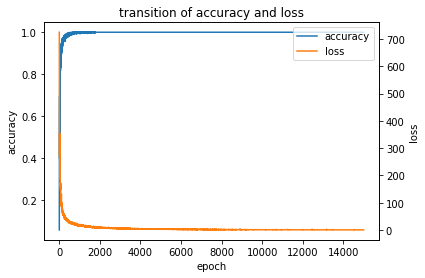

<< noise 0 [%] done >>
<< successfully layers are updated >>
<< noise 1 [%] >>
--------- epoch0 ---------
loss : 712.0078337553313
accuracy : 0.14727722772277227
time : 0.001811981201171875 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.583942697473637
accuracy : 0.9987623762376238
time : 16.78151297569275 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.5845601336957351
accuracy : 1.0
time : 33.18425107002258 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 53.21295094490051 [sec]
Train set accuracy : 1.0


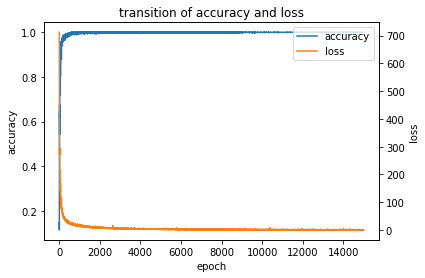

<< noise 1 [%] done >>
<< successfully layers are updated >>
<< noise 2 [%] >>
--------- epoch0 ---------
loss : 807.0027672152366
accuracy : 0.10891089108910891
time : 0.002017974853515625 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.838267554973492
accuracy : 0.9987623762376238
time : 17.964958906173706 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.5873395046945808
accuracy : 0.9987623762376238
time : 36.316192865371704 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 53.68880081176758 [sec]
Train set accuracy : 0.9992576095025983


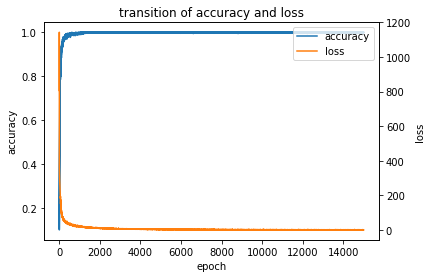

<< noise 2 [%] done >>
<< successfully layers are updated >>
<< noise 3 [%] >>
--------- epoch0 ---------
loss : 600.3475601650796
accuracy : 0.10024752475247525
time : 0.002746105194091797 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.278939061688046
accuracy : 1.0
time : 18.4311580657959 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.48337784929410027
accuracy : 1.0
time : 36.33511805534363 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 54.688186168670654 [sec]
Train set accuracy : 1.0


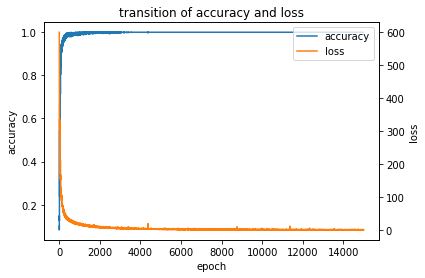

<< noise 3 [%] done >>
<< successfully layers are updated >>
<< noise 4 [%] >>
--------- epoch0 ---------
loss : 756.0811343716916
accuracy : 0.06806930693069307
time : 0.0035140514373779297 [sec]
--------------------------

--------- epoch5000 ---------
loss : 1.620822210723864
accuracy : 1.0
time : 18.277649879455566 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.3109616245012491
accuracy : 1.0
time : 36.55941700935364 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 53.99809002876282 [sec]
Train set accuracy : 1.0


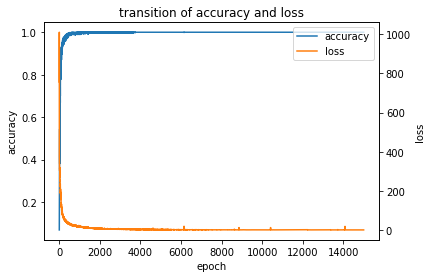

<< noise 4 [%] done >>
<< successfully layers are updated >>
<< noise 5 [%] >>
--------- epoch0 ---------
loss : 666.3289280509177
accuracy : 0.11757425742574257
time : 0.011199951171875 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.3390026262543975
accuracy : 1.0
time : 18.664988040924072 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.5395309528939896
accuracy : 1.0
time : 36.188873052597046 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 54.3515191078186 [sec]
Train set accuracy : 1.0


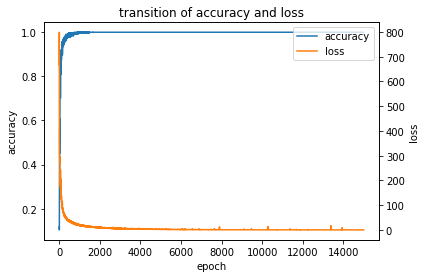

<< noise 5 [%] done >>
<< successfully layers are updated >>
<< noise 6 [%] >>
--------- epoch0 ---------
loss : 493.1297455877302
accuracy : 0.0853960396039604
time : 0.0013589859008789062 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.33164588186036
accuracy : 1.0
time : 17.89512586593628 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.7949981100667288
accuracy : 1.0
time : 36.749868869781494 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 54.29973888397217 [sec]
Train set accuracy : 1.0


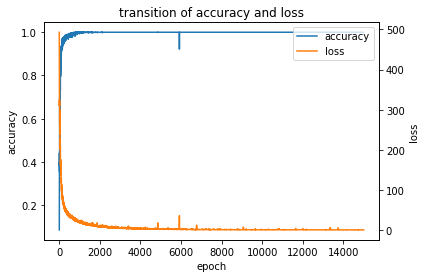

<< noise 6 [%] done >>
<< successfully layers are updated >>
<< noise 7 [%] >>
--------- epoch0 ---------
loss : 523.0263631573979
accuracy : 0.11262376237623763
time : 0.0016529560089111328 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.3388025935077135
accuracy : 0.9987623762376238
time : 19.69753408432007 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.8829948020647275
accuracy : 1.0
time : 37.98073410987854 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 57.04517698287964 [sec]
Train set accuracy : 1.0


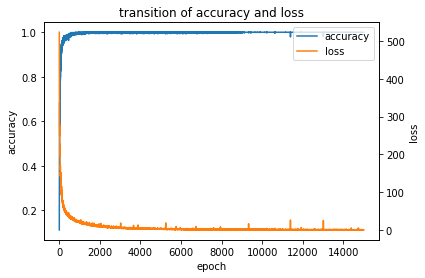

<< noise 7 [%] done >>
<< successfully layers are updated >>
<< noise 8 [%] >>
--------- epoch0 ---------
loss : 1297.8881576791614
accuracy : 0.09900990099009901
time : 0.0015921592712402344 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.951294024879603
accuracy : 1.0
time : 17.007644176483154 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.1440763822009934
accuracy : 0.9987623762376238
time : 34.497483015060425 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 51.09941601753235 [sec]
Train set accuracy : 0.9985152190051967


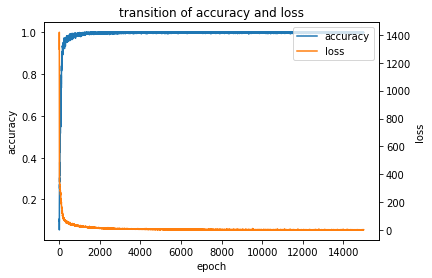

<< noise 8 [%] done >>
<< successfully layers are updated >>
<< noise 9 [%] >>
--------- epoch0 ---------
loss : 513.265928453507
accuracy : 0.0952970297029703
time : 0.001605987548828125 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.6016572425007816
accuracy : 1.0
time : 19.01263689994812 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.3284320494370165
accuracy : 1.0
time : 37.502410888671875 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 55.44711494445801 [sec]
Train set accuracy : 1.0


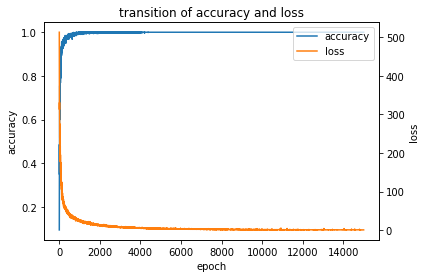

<< noise 9 [%] done >>
<< successfully layers are updated >>
<< noise 10 [%] >>
--------- epoch0 ---------
loss : 668.283768679194
accuracy : 0.1150990099009901
time : 0.0016200542449951172 [sec]
--------------------------

--------- epoch5000 ---------
loss : 1.9738490465008176
accuracy : 1.0
time : 18.31331706047058 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.8585063593804468
accuracy : 1.0
time : 36.57624793052673 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 54.71920895576477 [sec]
Train set accuracy : 1.0


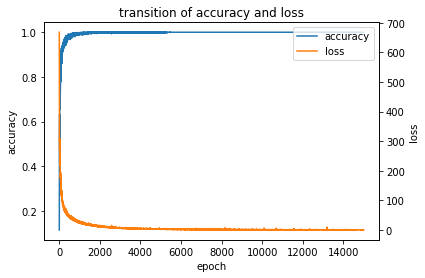

<< noise 10 [%] done >>
<< successfully layers are updated >>
<< noise 11 [%] >>
--------- epoch0 ---------
loss : 583.1668653057552
accuracy : 0.09900990099009901
time : 0.002022981643676758 [sec]
--------------------------

--------- epoch5000 ---------
loss : 6.14160266140038
accuracy : 0.9962871287128713
time : 18.067149877548218 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.9359581011326217
accuracy : 1.0
time : 36.665427923202515 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 54.66902494430542 [sec]
Train set accuracy : 1.0


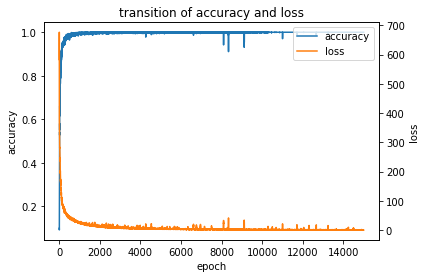

<< noise 11 [%] done >>
<< successfully layers are updated >>
<< noise 12 [%] >>
--------- epoch0 ---------
loss : 749.62837631565
accuracy : 0.07178217821782178
time : 0.0019049644470214844 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.9493999558471424
accuracy : 0.9987623762376238
time : 17.902790784835815 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.1741040801824971
accuracy : 1.0
time : 35.524008989334106 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 53.364691972732544 [sec]
Train set accuracy : 1.0


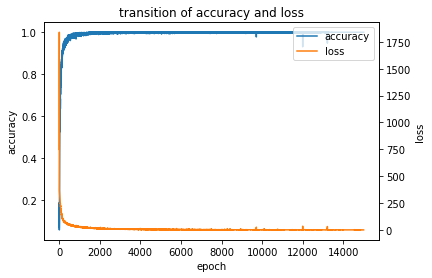

<< noise 12 [%] done >>
<< successfully layers are updated >>
<< noise 13 [%] >>
--------- epoch0 ---------
loss : 681.791720233595
accuracy : 0.09282178217821782
time : 0.0016422271728515625 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.133470538542531
accuracy : 1.0
time : 17.78148317337036 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.931863588829924
accuracy : 1.0
time : 35.70016407966614 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 53.186251163482666 [sec]
Train set accuracy : 1.0


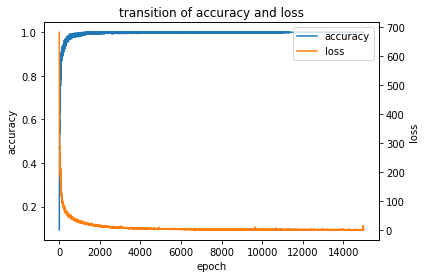

<< noise 13 [%] done >>
<< successfully layers are updated >>
<< noise 14 [%] >>
--------- epoch0 ---------
loss : 629.6650600287788
accuracy : 0.09034653465346534
time : 0.001714944839477539 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.5228385790232153
accuracy : 0.9962871287128713
time : 18.91124200820923 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.1641383094276057
accuracy : 1.0
time : 36.862114906311035 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 55.31834292411804 [sec]
Train set accuracy : 0.9992576095025983


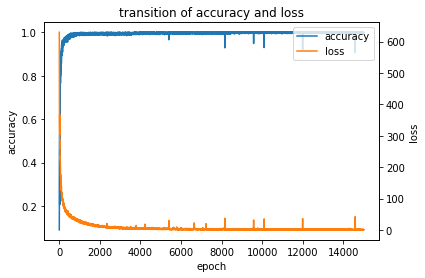

<< noise 14 [%] done >>
<< successfully layers are updated >>
<< noise 15 [%] >>
--------- epoch0 ---------
loss : 1036.2276285382434
accuracy : 0.09653465346534654
time : 0.0013418197631835938 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.152730498823968
accuracy : 1.0
time : 17.25040292739868 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.5920688563574508
accuracy : 0.9987623762376238
time : 35.1185097694397 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 56.4051878452301 [sec]
Train set accuracy : 0.9992576095025983


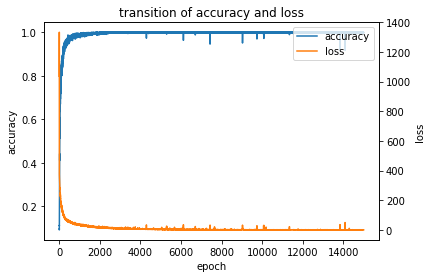

<< noise 15 [%] done >>
<< successfully layers are updated >>
<< noise 16 [%] >>
--------- epoch0 ---------
loss : 516.0506796652974
accuracy : 0.06683168316831684
time : 0.001683950424194336 [sec]
--------------------------

--------- epoch5000 ---------
loss : 5.089815529176711
accuracy : 1.0
time : 20.07800793647766 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.5303285538419544
accuracy : 1.0
time : 37.916478872299194 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 57.71854496002197 [sec]
Train set accuracy : 0.9992576095025983


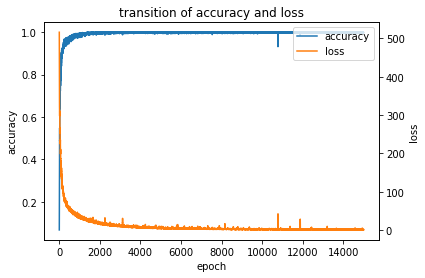

<< noise 16 [%] done >>
<< successfully layers are updated >>
<< noise 17 [%] >>
--------- epoch0 ---------
loss : 566.4945703015405
accuracy : 0.10891089108910891
time : 0.0013740062713623047 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.153890652285989
accuracy : 1.0
time : 20.16227388381958 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.7225463145018242
accuracy : 1.0
time : 39.23835587501526 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 58.485244035720825 [sec]
Train set accuracy : 1.0


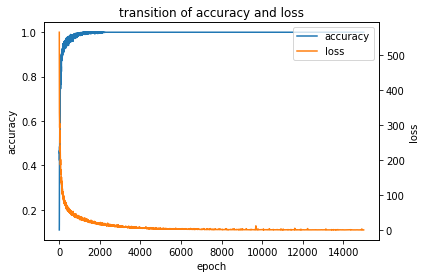

<< noise 17 [%] done >>
<< successfully layers are updated >>
<< noise 18 [%] >>
--------- epoch0 ---------
loss : 733.5252470938195
accuracy : 0.10272277227722772
time : 0.0016469955444335938 [sec]
--------------------------

--------- epoch5000 ---------
loss : 5.037632060560686
accuracy : 0.9962871287128713
time : 18.934792041778564 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 7.717573079395861
accuracy : 0.9975247524752475
time : 37.10486197471619 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 55.0977520942688 [sec]
Train set accuracy : 0.9992576095025983


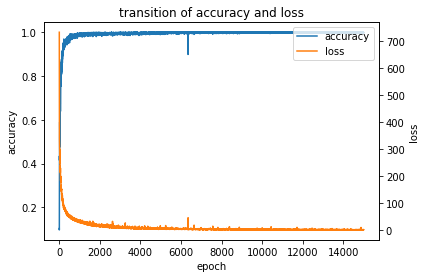

<< noise 18 [%] done >>
<< successfully layers are updated >>
<< noise 19 [%] >>
--------- epoch0 ---------
loss : 785.4358628678558
accuracy : 0.10024752475247525
time : 0.0013151168823242188 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.174485790423987
accuracy : 1.0
time : 17.37874698638916 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.33491980559512396
accuracy : 1.0
time : 34.28176212310791 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 53.84652805328369 [sec]
Train set accuracy : 1.0


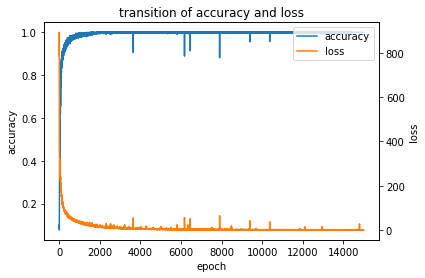

<< noise 19 [%] done >>
<< successfully layers are updated >>
<< noise 20 [%] >>
--------- epoch0 ---------
loss : 671.7939555276719
accuracy : 0.09282178217821782
time : 0.0023179054260253906 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.4352684831829583
accuracy : 0.995049504950495
time : 18.165701866149902 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.8089061849469805
accuracy : 1.0
time : 35.98766589164734 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 54.68084692955017 [sec]
Train set accuracy : 1.0


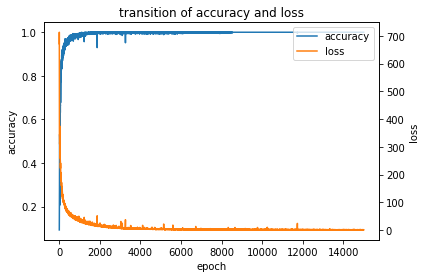

<< noise 20 [%] done >>
<< successfully layers are updated >>
<< noise 21 [%] >>
--------- epoch0 ---------
loss : 887.6303594598364
accuracy : 0.054455445544554455
time : 0.0018482208251953125 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.7688399246728546
accuracy : 1.0
time : 19.71641707420349 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.1766263436899678
accuracy : 0.9987623762376238
time : 37.35168719291687 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 54.11318016052246 [sec]
Train set accuracy : 0.9992576095025983


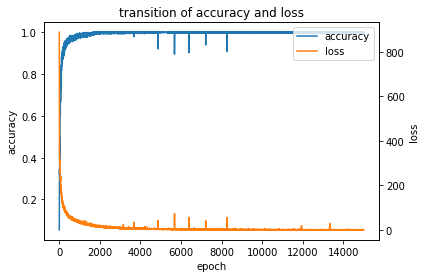

<< noise 21 [%] done >>
<< successfully layers are updated >>
<< noise 22 [%] >>
--------- epoch0 ---------
loss : 643.1200950372877
accuracy : 0.08787128712871287
time : 0.0019099712371826172 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.19412667768088
accuracy : 1.0
time : 18.79126000404358 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.140191022670841
accuracy : 0.9975247524752475
time : 39.080101013183594 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 59.215514183044434 [sec]
Train set accuracy : 0.9985152190051967


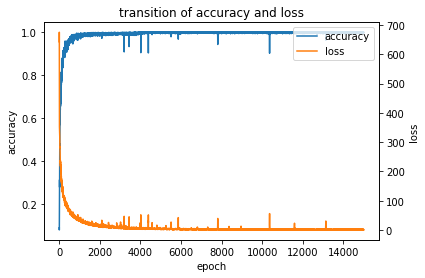

<< noise 22 [%] done >>
<< successfully layers are updated >>
<< noise 23 [%] >>
--------- epoch0 ---------
loss : 784.4136006300287
accuracy : 0.0853960396039604
time : 0.0015630722045898438 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.032294705765986
accuracy : 0.9962871287128713
time : 18.379920959472656 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.7649117418855058
accuracy : 0.995049504950495
time : 36.67444896697998 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 53.373247146606445 [sec]
Train set accuracy : 0.9985152190051967


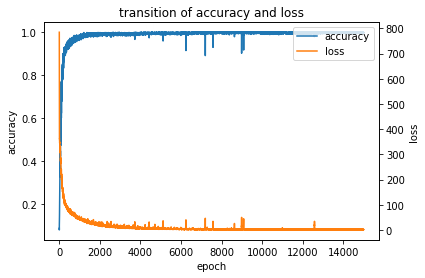

<< noise 23 [%] done >>
<< successfully layers are updated >>
<< noise 24 [%] >>
--------- epoch0 ---------
loss : 607.863770029979
accuracy : 0.07797029702970297
time : 0.0013229846954345703 [sec]
--------------------------

--------- epoch5000 ---------
loss : 5.383513644567028
accuracy : 0.9962871287128713
time : 20.030810117721558 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 2.765237497407488
accuracy : 0.9975247524752475
time : 37.459234952926636 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 54.82163405418396 [sec]
Train set accuracy : 0.9970304380103935


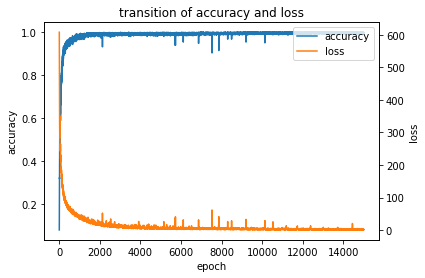

<< noise 24 [%] done >>
<< successfully layers are updated >>
<< noise 25 [%] >>
--------- epoch0 ---------
loss : 838.592127615186
accuracy : 0.06683168316831684
time : 0.0015599727630615234 [sec]
--------------------------

--------- epoch5000 ---------
loss : 5.78437951357403
accuracy : 0.995049504950495
time : 19.939693927764893 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 2.344119244358349
accuracy : 1.0
time : 39.844403982162476 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 60.03003406524658 [sec]
Train set accuracy : 0.9992576095025983


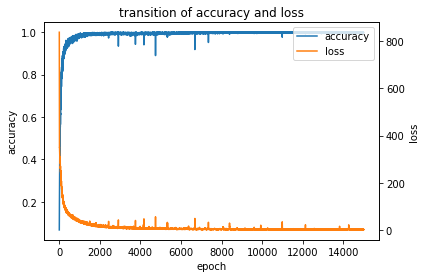

<< noise 25 [%] done >>
<< successfully layers are updated >>
<< noise 26 [%] >>
--------- epoch0 ---------
loss : 548.4993688744138
accuracy : 0.13613861386138615
time : 0.001444101333618164 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.248367845266257
accuracy : 0.9987623762376238
time : 17.985502004623413 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 2.1255423706560994
accuracy : 0.9987623762376238
time : 37.10152816772461 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 55.08113408088684 [sec]
Train set accuracy : 0.9992576095025983


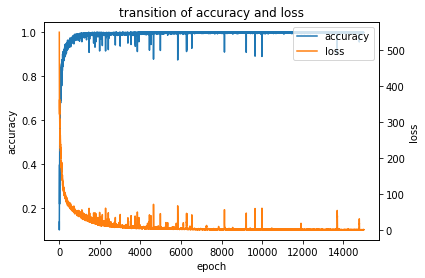

<< noise 26 [%] done >>
<< successfully layers are updated >>
<< noise 27 [%] >>
--------- epoch0 ---------
loss : 656.9838082987008
accuracy : 0.0891089108910891
time : 0.0014760494232177734 [sec]
--------------------------

--------- epoch5000 ---------
loss : 6.300451378586233
accuracy : 0.9962871287128713
time : 18.794417142868042 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.6845006316726723
accuracy : 1.0
time : 35.27405905723572 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 55.950953006744385 [sec]
Train set accuracy : 0.9992576095025983


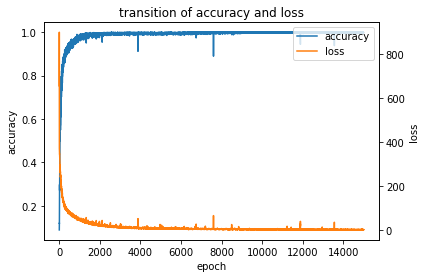

<< noise 27 [%] done >>
<< successfully layers are updated >>
<< noise 28 [%] >>
--------- epoch0 ---------
loss : 685.0437770171961
accuracy : 0.1188118811881188
time : 0.0015439987182617188 [sec]
--------------------------

--------- epoch5000 ---------
loss : 9.069759191272588
accuracy : 0.9975247524752475
time : 18.252189874649048 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.383590843347556
accuracy : 0.9975247524752475
time : 37.13007092475891 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 55.44221305847168 [sec]
Train set accuracy : 0.9977728285077951


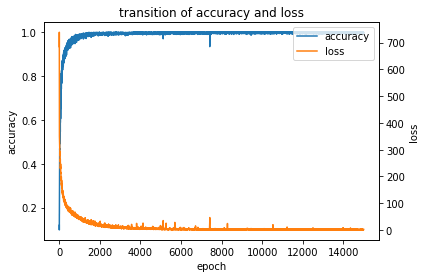

<< noise 28 [%] done >>
<< successfully layers are updated >>
<< noise 29 [%] >>
--------- epoch0 ---------
loss : 655.5052598806633
accuracy : 0.11262376237623763
time : 0.0014629364013671875 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.65681713894555
accuracy : 0.9962871287128713
time : 18.372951984405518 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.837908107329893
accuracy : 0.9987623762376238
time : 37.744616985321045 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 66.59393692016602 [sec]
Train set accuracy : 0.9962880475129918


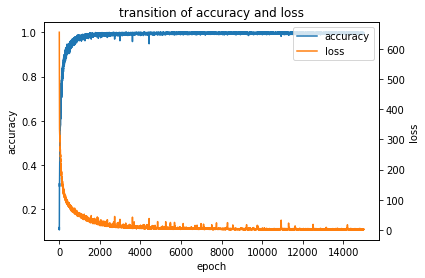

<< noise 29 [%] done >>


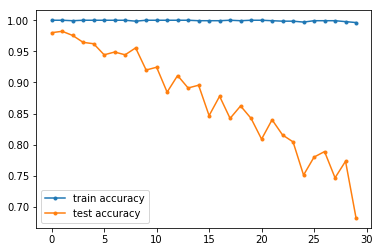

<< successfully layers are updated >>
<< noise 0 [%] >>
--------- epoch0 ---------
loss : 860.9495259998648
accuracy : 0.0594059405940594
time : 0.002179861068725586 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.079196682355644
accuracy : 1.0
time : 20.694568872451782 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.9370917143114865
accuracy : 1.0
time : 41.95263600349426 [sec]
------------------------------

--------- epoch15000 ---------
loss : 1.159330585501829
accuracy : 1.0
time : 60.775601863861084 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 81.27064490318298 [sec]
Train set accuracy : 1.0


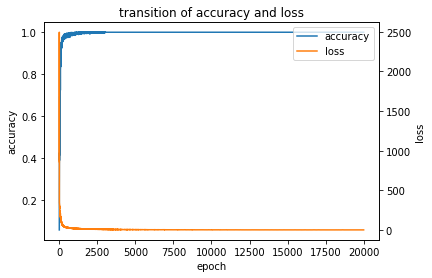

<< noise 0 [%] done >>
<< successfully layers are updated >>
<< noise 1 [%] >>
--------- epoch0 ---------
loss : 530.0572572276319
accuracy : 0.07301980198019802
time : 0.001856088638305664 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.6656891114106602
accuracy : 0.9987623762376238
time : 21.620537996292114 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.884023231241984
accuracy : 1.0
time : 40.1620659828186 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.8447414646518414
accuracy : 1.0
time : 62.13414692878723 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 80.65305995941162 [sec]
Train set accuracy : 1.0


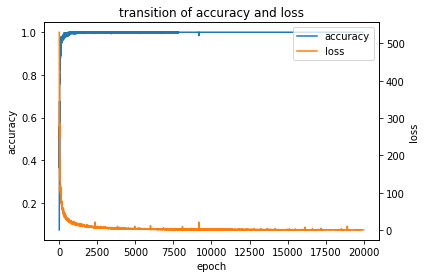

<< noise 1 [%] done >>
<< successfully layers are updated >>
<< noise 2 [%] >>
--------- epoch0 ---------
loss : 616.6450615996487
accuracy : 0.10148514851485149
time : 0.002023935317993164 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.143842395116611
accuracy : 1.0
time : 20.259083032608032 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.1719951339457437
accuracy : 1.0
time : 39.91464591026306 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.7069953167712858
accuracy : 1.0
time : 60.51350998878479 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 79.82392382621765 [sec]
Train set accuracy : 1.0


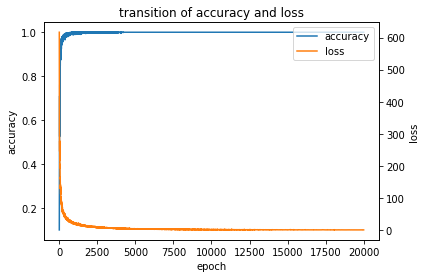

<< noise 2 [%] done >>
<< successfully layers are updated >>
<< noise 3 [%] >>
--------- epoch0 ---------
loss : 658.722252352022
accuracy : 0.07673267326732673
time : 0.002196073532104492 [sec]
--------------------------

--------- epoch5000 ---------
loss : 1.656661111725934
accuracy : 1.0
time : 20.612037181854248 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.7921313834171204
accuracy : 1.0
time : 41.90150022506714 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.37803878072080555
accuracy : 1.0
time : 61.23758411407471 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 79.86780405044556 [sec]
Train set accuracy : 1.0


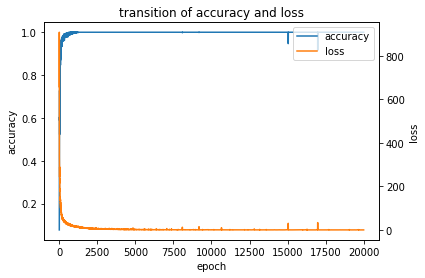

<< noise 3 [%] done >>
<< successfully layers are updated >>
<< noise 4 [%] >>
--------- epoch0 ---------
loss : 453.64845184590223
accuracy : 0.09900990099009901
time : 0.0016870498657226562 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.5916319500306777
accuracy : 1.0
time : 21.39167594909668 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.4617574907319886
accuracy : 1.0
time : 42.457213163375854 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.3273806277455972
accuracy : 1.0
time : 62.65168595314026 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 83.80667614936829 [sec]
Train set accuracy : 1.0


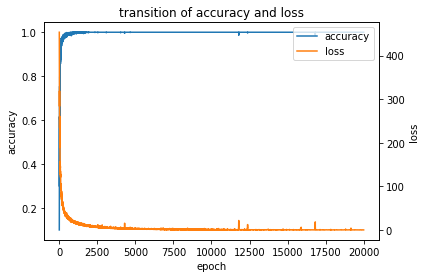

<< noise 4 [%] done >>
<< successfully layers are updated >>
<< noise 5 [%] >>
--------- epoch0 ---------
loss : 731.2912366379478
accuracy : 0.053217821782178217
time : 0.0016028881072998047 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.419454897583278
accuracy : 1.0
time : 17.041895866394043 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.8616985011042537
accuracy : 1.0
time : 34.57789993286133 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.387736581901973
accuracy : 1.0
time : 51.39672493934631 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 74.59238505363464 [sec]
Train set accuracy : 1.0


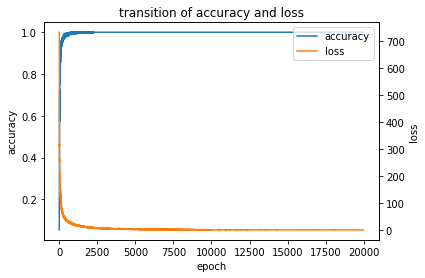

<< noise 5 [%] done >>
<< successfully layers are updated >>
<< noise 6 [%] >>
--------- epoch0 ---------
loss : 574.7722340187242
accuracy : 0.10767326732673267
time : 0.010557889938354492 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.5438620869555635
accuracy : 1.0
time : 22.822633028030396 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.3150489915734797
accuracy : 1.0
time : 44.477405071258545 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.18106588263251028
accuracy : 1.0
time : 64.89314293861389 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 82.86310005187988 [sec]
Train set accuracy : 1.0


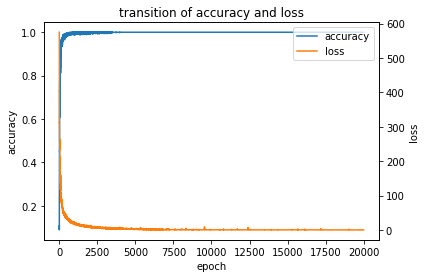

<< noise 6 [%] done >>
<< successfully layers are updated >>
<< noise 7 [%] >>
--------- epoch0 ---------
loss : 458.16038399629036
accuracy : 0.1373762376237624
time : 0.0018851757049560547 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.509594745113711
accuracy : 1.0
time : 18.808063983917236 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.9869170062586912
accuracy : 1.0
time : 37.936726093292236 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.542605299604366
accuracy : 1.0
time : 57.375017166137695 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 75.3895320892334 [sec]
Train set accuracy : 1.0


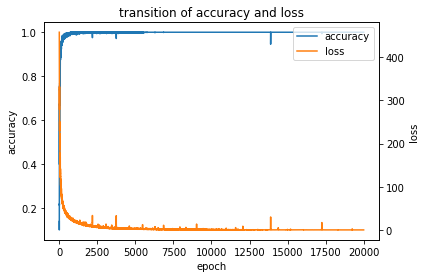

<< noise 7 [%] done >>
<< successfully layers are updated >>
<< noise 8 [%] >>
--------- epoch0 ---------
loss : 648.5403086308659
accuracy : 0.1905940594059406
time : 0.0016241073608398438 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.0068965308228086
accuracy : 1.0
time : 18.170607089996338 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.6172501335121199
accuracy : 1.0
time : 35.39841914176941 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.16961753758021636
accuracy : 1.0
time : 52.86401700973511 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 70.59002804756165 [sec]
Train set accuracy : 1.0


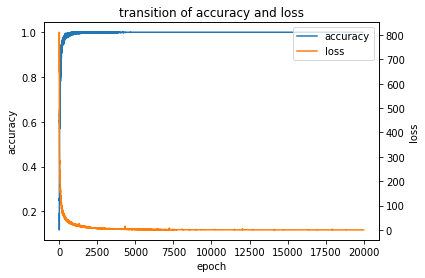

<< noise 8 [%] done >>
<< successfully layers are updated >>
<< noise 9 [%] >>
--------- epoch0 ---------
loss : 640.9446911077541
accuracy : 0.06930693069306931
time : 0.0016667842864990234 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.3873130044878685
accuracy : 1.0
time : 19.16280198097229 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.731556006764486
accuracy : 1.0
time : 36.31481695175171 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.23987766687219333
accuracy : 1.0
time : 54.72733688354492 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 72.40259599685669 [sec]
Train set accuracy : 1.0


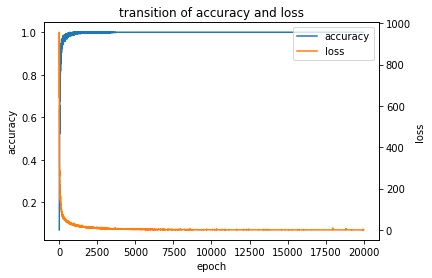

<< noise 9 [%] done >>
<< successfully layers are updated >>
<< noise 10 [%] >>
--------- epoch0 ---------
loss : 584.8898354014466
accuracy : 0.16831683168316833
time : 0.0015110969543457031 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.0055281242201417
accuracy : 1.0
time : 19.822456121444702 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.8260594845358629
accuracy : 1.0
time : 38.18206810951233 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.26029818600803784
accuracy : 1.0
time : 57.80400013923645 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 77.42711520195007 [sec]
Train set accuracy : 1.0


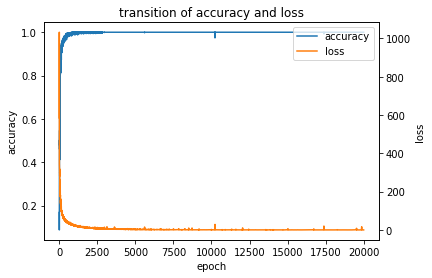

<< noise 10 [%] done >>
<< successfully layers are updated >>
<< noise 11 [%] >>
--------- epoch0 ---------
loss : 686.6053715137232
accuracy : 0.09158415841584158
time : 0.005799055099487305 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.061991887714516
accuracy : 1.0
time : 17.963301181793213 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.7658794378529364
accuracy : 1.0
time : 39.63212609291077 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.2606554917003301
accuracy : 1.0
time : 57.10763716697693 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 74.78501796722412 [sec]
Train set accuracy : 1.0


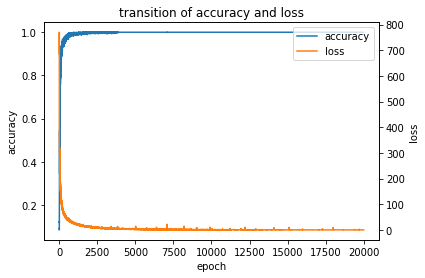

<< noise 11 [%] done >>
<< successfully layers are updated >>
<< noise 12 [%] >>
--------- epoch0 ---------
loss : 532.3038955456946
accuracy : 0.10643564356435643
time : 0.0015118122100830078 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.368681652212799
accuracy : 1.0
time : 18.57458186149597 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.4255352013561952
accuracy : 1.0
time : 40.382319927215576 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.8195465789715515
accuracy : 1.0
time : 58.87704682350159 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 82.218594789505 [sec]
Train set accuracy : 1.0


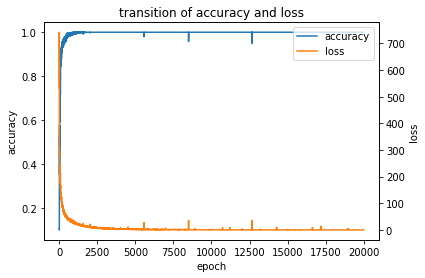

<< noise 12 [%] done >>
<< successfully layers are updated >>
<< noise 13 [%] >>
--------- epoch0 ---------
loss : 584.927284935341
accuracy : 0.06683168316831684
time : 0.001956939697265625 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.380747086165878
accuracy : 1.0
time : 18.05477499961853 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.632010895512435
accuracy : 1.0
time : 34.431241035461426 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.12411388749943114
accuracy : 1.0
time : 51.04642081260681 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 68.24405002593994 [sec]
Train set accuracy : 1.0


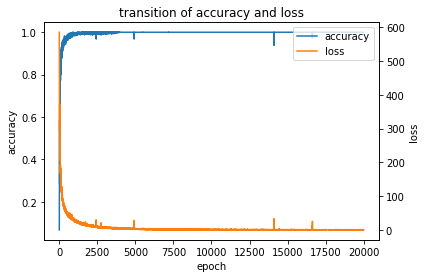

<< noise 13 [%] done >>
<< successfully layers are updated >>
<< noise 14 [%] >>
--------- epoch0 ---------
loss : 873.053673872738
accuracy : 0.09900990099009901
time : 0.0014379024505615234 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.8196287352965896
accuracy : 1.0
time : 17.716705083847046 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.4231452960595202
accuracy : 1.0
time : 34.56741404533386 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.19122890748508797
accuracy : 1.0
time : 52.68427801132202 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 68.73913908004761 [sec]
Train set accuracy : 1.0


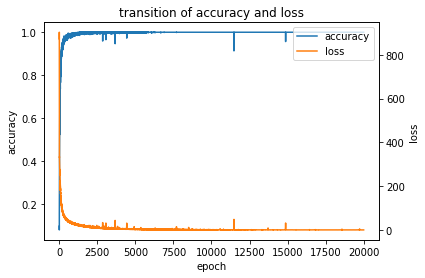

<< noise 14 [%] done >>
<< successfully layers are updated >>
<< noise 15 [%] >>
--------- epoch0 ---------
loss : 615.2164265758106
accuracy : 0.12128712871287128
time : 0.0016491413116455078 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.072241555539315
accuracy : 1.0
time : 17.10010004043579 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.5715234284364287
accuracy : 1.0
time : 33.524670124053955 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.3455352305094942
accuracy : 1.0
time : 50.329257011413574 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 66.57641792297363 [sec]
Train set accuracy : 1.0


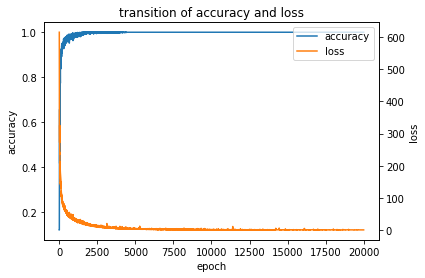

<< noise 15 [%] done >>
<< successfully layers are updated >>
<< noise 16 [%] >>
--------- epoch0 ---------
loss : 545.8448678690681
accuracy : 0.11633663366336634
time : 0.0016949176788330078 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.6081764765409456
accuracy : 0.9987623762376238
time : 17.04316997528076 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.7105540825499524
accuracy : 0.9987623762376238
time : 33.84485411643982 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.4305073663528575
accuracy : 0.9987623762376238
time : 50.85245990753174 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 67.02805995941162 [sec]
Train set accuracy : 1.0


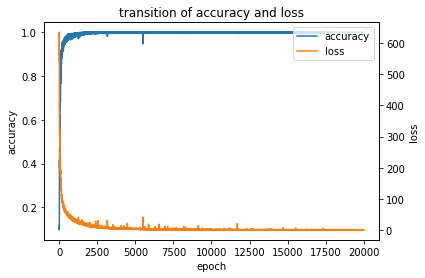

<< noise 16 [%] done >>
<< successfully layers are updated >>
<< noise 17 [%] >>
--------- epoch0 ---------
loss : 480.73607553896636
accuracy : 0.12871287128712872
time : 0.0016961097717285156 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.493963798223107
accuracy : 0.9962871287128713
time : 17.06652808189392 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.999705277776549
accuracy : 1.0
time : 33.31073808670044 [sec]
------------------------------

--------- epoch15000 ---------
loss : 1.1010962360479701
accuracy : 1.0
time : 50.41767597198486 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 66.41480493545532 [sec]
Train set accuracy : 1.0


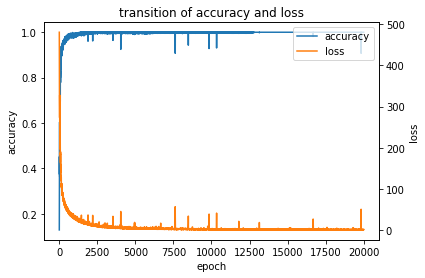

<< noise 17 [%] done >>
<< successfully layers are updated >>
<< noise 18 [%] >>
--------- epoch0 ---------
loss : 701.4755843105569
accuracy : 0.1373762376237624
time : 0.0016968250274658203 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.76206698239037
accuracy : 0.9987623762376238
time : 17.942994832992554 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 2.0655129570647
accuracy : 1.0
time : 34.115931034088135 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.27026891513120666
accuracy : 1.0
time : 51.09666705131531 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 68.02258586883545 [sec]
Train set accuracy : 1.0


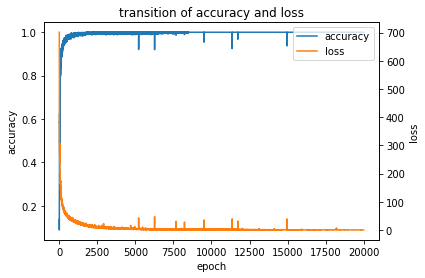

<< noise 18 [%] done >>
<< successfully layers are updated >>
<< noise 19 [%] >>
--------- epoch0 ---------
loss : 444.65711820181593
accuracy : 0.08663366336633663
time : 0.0016770362854003906 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.6461065340565924
accuracy : 1.0
time : 16.868335962295532 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.6947647141899785
accuracy : 1.0
time : 33.95896005630493 [sec]
------------------------------

--------- epoch15000 ---------
loss : 1.0804069538049714
accuracy : 0.9975247524752475
time : 50.45882797241211 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 67.76230907440186 [sec]
Train set accuracy : 0.9992576095025983


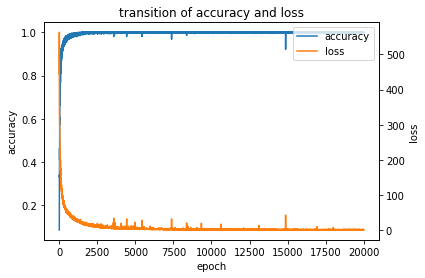

<< noise 19 [%] done >>
<< successfully layers are updated >>
<< noise 20 [%] >>
--------- epoch0 ---------
loss : 1237.7600797408704
accuracy : 0.07549504950495049
time : 0.001806020736694336 [sec]
--------------------------

--------- epoch5000 ---------
loss : 7.077786383111899
accuracy : 0.9975247524752475
time : 16.25691294670105 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.9545085046109678
accuracy : 1.0
time : 32.908113956451416 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.5466188500592324
accuracy : 1.0
time : 48.99708104133606 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 65.51159000396729 [sec]
Train set accuracy : 1.0


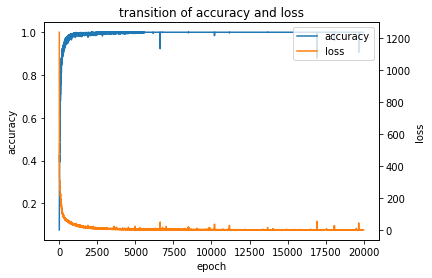

<< noise 20 [%] done >>
<< successfully layers are updated >>
<< noise 21 [%] >>
--------- epoch0 ---------
loss : 516.7642444452739
accuracy : 0.09405940594059406
time : 0.0018208026885986328 [sec]
--------------------------

--------- epoch5000 ---------
loss : 12.933670996606986
accuracy : 0.9987623762376238
time : 16.946632862091064 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.7408642875493117
accuracy : 1.0
time : 34.15811896324158 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.2122858673550572
accuracy : 1.0
time : 50.48196482658386 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 68.10934495925903 [sec]
Train set accuracy : 1.0


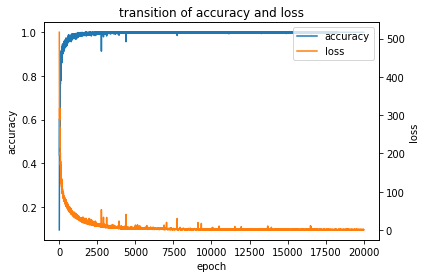

<< noise 21 [%] done >>
<< successfully layers are updated >>
<< noise 22 [%] >>
--------- epoch0 ---------
loss : 853.2082045714255
accuracy : 0.06064356435643564
time : 0.0016870498657226562 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.3296059810411123
accuracy : 0.9987623762376238
time : 15.783614158630371 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.9767718978527786
accuracy : 0.9987623762376238
time : 32.229161977767944 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.4666687877806889
accuracy : 0.9987623762376238
time : 48.04564809799194 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 64.1218490600586 [sec]
Train set accuracy : 0.9985152190051967


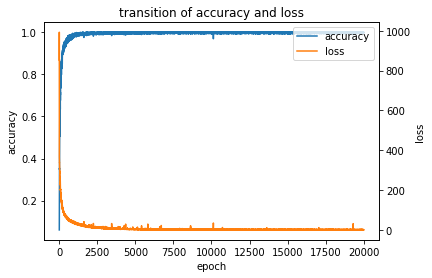

<< noise 22 [%] done >>
<< successfully layers are updated >>
<< noise 23 [%] >>
--------- epoch0 ---------
loss : 523.2802962846915
accuracy : 0.08044554455445545
time : 0.0016949176788330078 [sec]
--------------------------

--------- epoch5000 ---------
loss : 6.928840364630525
accuracy : 0.9987623762376238
time : 16.925275087356567 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.4258713295229897
accuracy : 0.9987623762376238
time : 33.476933002471924 [sec]
------------------------------

--------- epoch15000 ---------
loss : 1.130459141135738
accuracy : 0.9987623762376238
time : 50.60203504562378 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 66.78825497627258 [sec]
Train set accuracy : 0.9992576095025983


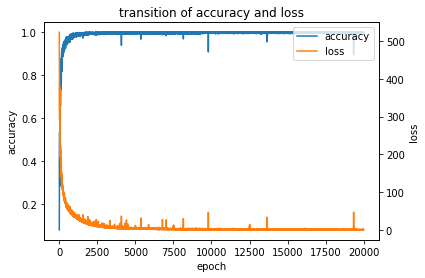

<< noise 23 [%] done >>
<< successfully layers are updated >>
<< noise 24 [%] >>
--------- epoch0 ---------
loss : 588.191020616048
accuracy : 0.11014851485148515
time : 0.002552032470703125 [sec]
--------------------------

--------- epoch5000 ---------
loss : 6.9374831195263145
accuracy : 0.9962871287128713
time : 17.152170181274414 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.5625853098181333
accuracy : 0.9975247524752475
time : 33.54768705368042 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.8496469492698822
accuracy : 0.9987623762376238
time : 50.757282972335815 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 67.00550413131714 [sec]
Train set accuracy : 1.0


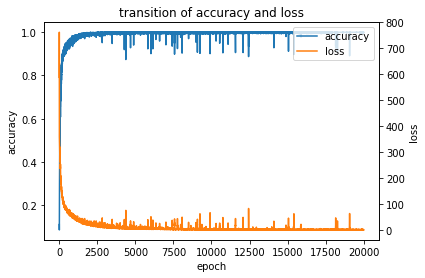

<< noise 24 [%] done >>
<< successfully layers are updated >>
<< noise 25 [%] >>
--------- epoch0 ---------
loss : 916.7708510373818
accuracy : 0.15594059405940594
time : 0.00144195556640625 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.9698295052275063
accuracy : 0.9962871287128713
time : 16.977170944213867 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.49997056102719
accuracy : 0.9962871287128713
time : 33.602246046066284 [sec]
------------------------------

--------- epoch15000 ---------
loss : 1.632184699113402
accuracy : 0.9962871287128713
time : 50.30553889274597 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 65.88329195976257 [sec]
Train set accuracy : 0.9985152190051967


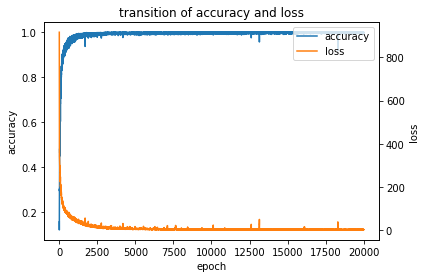

<< noise 25 [%] done >>
<< successfully layers are updated >>
<< noise 26 [%] >>
--------- epoch0 ---------
loss : 789.3183042712586
accuracy : 0.09653465346534654
time : 0.0013608932495117188 [sec]
--------------------------

--------- epoch5000 ---------
loss : 7.966726946808992
accuracy : 0.9938118811881188
time : 16.785590887069702 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 5.359155901682643
accuracy : 0.9962871287128713
time : 32.44811701774597 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.9502144572824216
accuracy : 1.0
time : 49.01308584213257 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 64.59142684936523 [sec]
Train set accuracy : 0.9992576095025983


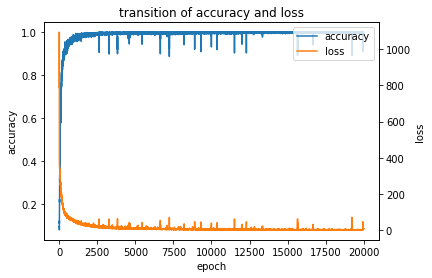

<< noise 26 [%] done >>
<< successfully layers are updated >>
<< noise 27 [%] >>
--------- epoch0 ---------
loss : 1029.672991074805
accuracy : 0.0891089108910891
time : 0.0014200210571289062 [sec]
--------------------------

--------- epoch5000 ---------
loss : 9.79670829896635
accuracy : 0.9962871287128713
time : 17.563058853149414 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 3.0680349982617887
accuracy : 0.9987623762376238
time : 34.257099866867065 [sec]
------------------------------

--------- epoch15000 ---------
loss : 1.939390677065853
accuracy : 0.9975247524752475
time : 50.210142850875854 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 66.67698502540588 [sec]
Train set accuracy : 0.9992576095025983


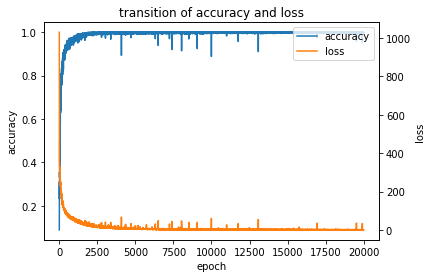

<< noise 27 [%] done >>
<< successfully layers are updated >>
<< noise 28 [%] >>
--------- epoch0 ---------
loss : 521.3787988855518
accuracy : 0.0891089108910891
time : 0.001383066177368164 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.27257282768398
accuracy : 0.9987623762376238
time : 16.668256044387817 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.1257116000143217
accuracy : 1.0
time : 33.174232959747314 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.7432735818597332
accuracy : 1.0
time : 49.368671894073486 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 66.40916800498962 [sec]
Train set accuracy : 1.0


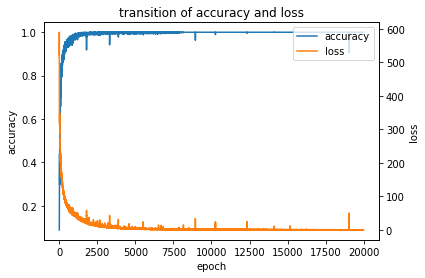

<< noise 28 [%] done >>
<< successfully layers are updated >>
<< noise 29 [%] >>
--------- epoch0 ---------
loss : 709.2360507953734
accuracy : 0.0952970297029703
time : 0.0015139579772949219 [sec]
--------------------------

--------- epoch5000 ---------
loss : 6.741138623540043
accuracy : 1.0
time : 16.48471999168396 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.5445852352198814
accuracy : 1.0
time : 32.93538689613342 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.2889073898180711
accuracy : 1.0
time : 48.815186977386475 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 65.18618583679199 [sec]
Train set accuracy : 0.9977728285077951


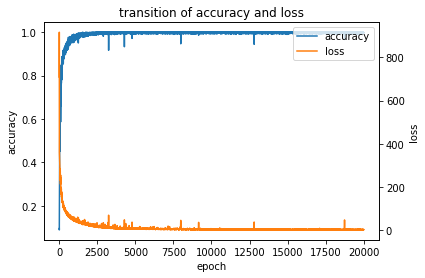

<< noise 29 [%] done >>


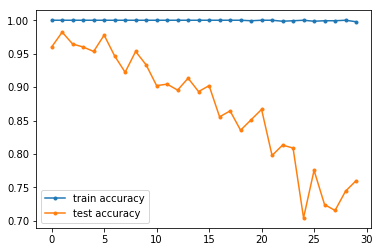

<< successfully layers are updated >>
<< noise 0 [%] >>
--------- epoch0 ---------
loss : 644.8651772756878
accuracy : 0.08415841584158416
time : 0.003553152084350586 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.348179229743611
accuracy : 1.0
time : 16.109309196472168 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.2124104406391742
accuracy : 1.0
time : 32.44011616706848 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.7370250279896973
accuracy : 1.0
time : 48.147592067718506 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.5417052763303013
accuracy : 1.0
time : 65.19541001319885 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.4035945831866283
accuracy : 1.0
time : 80.79470610618591 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 97.41473603248596 [sec]
Train set accuracy : 1.0

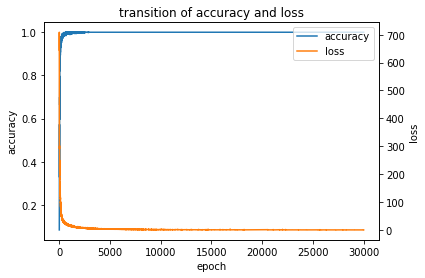

<< noise 0 [%] done >>
<< successfully layers are updated >>
<< noise 1 [%] >>
--------- epoch0 ---------
loss : 745.9501356413062
accuracy : 0.0891089108910891
time : 0.0013349056243896484 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.3644841189028853
accuracy : 1.0
time : 16.13199496269226 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.9737819930341438
accuracy : 1.0
time : 32.856586933135986 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.8133106584287175
accuracy : 1.0
time : 48.492148876190186 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.6539584099432096
accuracy : 1.0
time : 65.0773057937622 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.45431180387345754
accuracy : 1.0
time : 81.27765893936157 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 98.08633494377136 [sec]


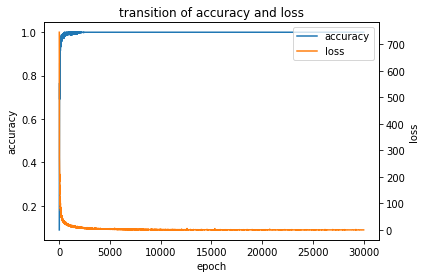

<< noise 1 [%] done >>
<< successfully layers are updated >>
<< noise 2 [%] >>
--------- epoch0 ---------
loss : 576.0034239667057
accuracy : 0.12004950495049505
time : 0.0014879703521728516 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.8539294422635635
accuracy : 1.0
time : 15.927372932434082 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.320035364284351
accuracy : 1.0
time : 32.82045292854309 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.6510159820256327
accuracy : 1.0
time : 48.70823812484741 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.38549487953110034
accuracy : 1.0
time : 65.4556999206543 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.18610235061390237
accuracy : 1.0
time : 81.89484190940857 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 98.37266802787781 [sec]


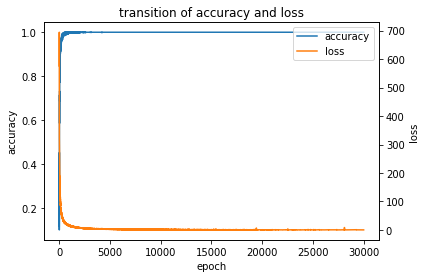

<< noise 2 [%] done >>
<< successfully layers are updated >>
<< noise 3 [%] >>
--------- epoch0 ---------
loss : 460.9482303234236
accuracy : 0.09653465346534654
time : 0.0015919208526611328 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.2404804957380526
accuracy : 1.0
time : 16.8959059715271 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.0522616443108868
accuracy : 1.0
time : 33.28124284744263 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.3977034932372666
accuracy : 1.0
time : 50.18547582626343 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.8631788024912728
accuracy : 1.0
time : 66.44965195655823 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.1872431361921372
accuracy : 1.0
time : 83.09876298904419 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 99.46834993362427 [sec]
Tr

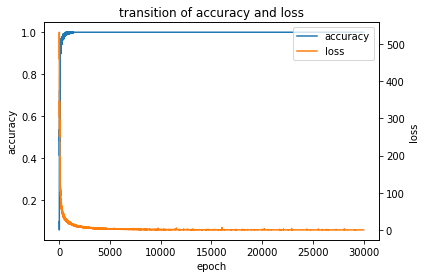

<< noise 3 [%] done >>
<< successfully layers are updated >>
<< noise 4 [%] >>
--------- epoch0 ---------
loss : 1089.7875722813055
accuracy : 0.09653465346534654
time : 0.0013949871063232422 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.446703317251418
accuracy : 1.0
time : 16.210160970687866 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.1662356429410403
accuracy : 0.9987623762376238
time : 32.35827398300171 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.32454898915765434
accuracy : 1.0
time : 48.29002499580383 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.220148392328063
accuracy : 1.0
time : 63.922701835632324 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.15142676650774795
accuracy : 1.0
time : 80.23686981201172 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 95.8097

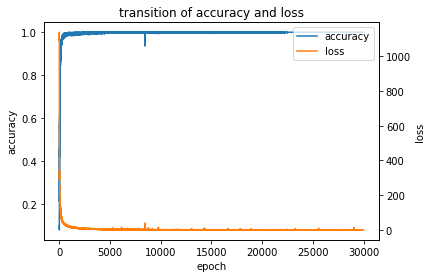

<< noise 4 [%] done >>
<< successfully layers are updated >>
<< noise 5 [%] >>
--------- epoch0 ---------
loss : 1041.660702866256
accuracy : 0.10272277227722772
time : 0.001750946044921875 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.91826467385948
accuracy : 0.9987623762376238
time : 15.708481788635254 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 2.5732879350572335
accuracy : 1.0
time : 30.874072790145874 [sec]
------------------------------

--------- epoch15000 ---------
loss : 1.4175889481740356
accuracy : 1.0
time : 46.67473578453064 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.6306888993151685
accuracy : 1.0
time : 61.62725591659546 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.797405177874251
accuracy : 1.0
time : 77.10375690460205 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 92.079559803

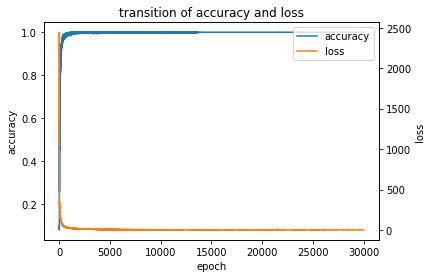

<< noise 5 [%] done >>
<< successfully layers are updated >>
<< noise 6 [%] >>
--------- epoch0 ---------
loss : 508.519890171409
accuracy : 0.04084158415841584
time : 0.0016641616821289062 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.418340170627557
accuracy : 0.9987623762376238
time : 16.902076959609985 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.5044785434713055
accuracy : 0.9987623762376238
time : 33.36666512489319 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.5084823407388472
accuracy : 1.0
time : 50.21112513542175 [sec]
------------------------------

--------- epoch20000 ---------
loss : 1.3497059212588445
accuracy : 0.9987623762376238
time : 66.56457614898682 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.5699849858669308
accuracy : 1.0
time : 85.24526906013489 [sec]
------------------------------



<< All training epochs ended. >>
========= result ======

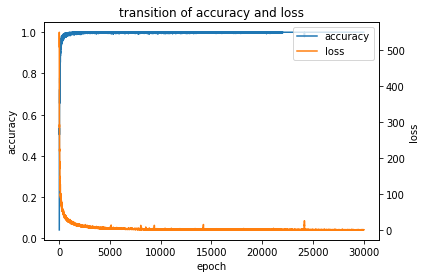

<< noise 6 [%] done >>
<< successfully layers are updated >>
<< noise 7 [%] >>
--------- epoch0 ---------
loss : 519.7874238409727
accuracy : 0.13985148514851486
time : 0.0023031234741210938 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.549051580936175
accuracy : 1.0
time : 19.372035026550293 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.7228432280516511
accuracy : 1.0
time : 37.2975549697876 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.18506086229125193
accuracy : 1.0
time : 56.25854206085205 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.4064519416318477
accuracy : 1.0
time : 74.06849098205566 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.19325518851470574
accuracy : 1.0
time : 93.41894912719727 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 111.02964901924133 [sec]

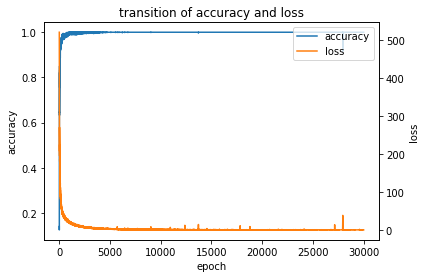

<< noise 7 [%] done >>
<< successfully layers are updated >>
<< noise 8 [%] >>
--------- epoch0 ---------
loss : 557.3253527374536
accuracy : 0.10396039603960396
time : 0.003470897674560547 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.745822522851556
accuracy : 1.0
time : 18.89861297607422 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.977997487454106
accuracy : 1.0
time : 36.63883304595947 [sec]
------------------------------

--------- epoch15000 ---------
loss : 1.1579008549516543
accuracy : 1.0
time : 55.248059034347534 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.512752319141512
accuracy : 1.0
time : 73.3395779132843 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.7318177193855246
accuracy : 0.9987623762376238
time : 91.53121495246887 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 110.0032439231

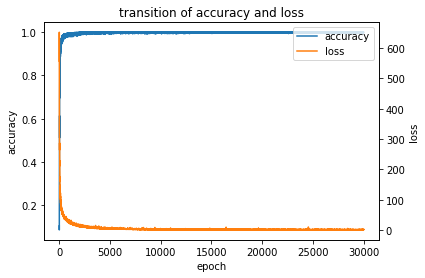

<< noise 8 [%] done >>
<< successfully layers are updated >>
<< noise 9 [%] >>
--------- epoch0 ---------
loss : 748.9094644087892
accuracy : 0.16212871287128713
time : 0.0015039443969726562 [sec]
--------------------------

--------- epoch5000 ---------
loss : 5.942723817096538
accuracy : 1.0
time : 17.83749508857727 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 2.754340162928207
accuracy : 0.9987623762376238
time : 35.52660393714905 [sec]
------------------------------

--------- epoch15000 ---------
loss : 2.173583844996325
accuracy : 1.0
time : 52.59653902053833 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.9033983785066566
accuracy : 1.0
time : 70.26535487174988 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.8720157637237911
accuracy : 1.0
time : 87.39095187187195 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 104.259885072

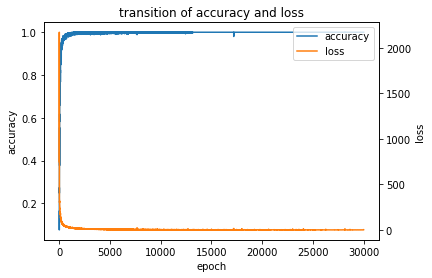

<< noise 9 [%] done >>
<< successfully layers are updated >>
<< noise 10 [%] >>
--------- epoch0 ---------
loss : 741.6469107065734
accuracy : 0.13985148514851486
time : 0.0022330284118652344 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.374614929122304
accuracy : 0.9975247524752475
time : 18.54710602760315 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.358269110163696
accuracy : 0.9975247524752475
time : 36.99111604690552 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.29374703198886654
accuracy : 1.0
time : 55.09985113143921 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.5685709347463307
accuracy : 1.0
time : 73.51670813560486 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.294806517483624
accuracy : 1.0
time : 91.34069514274597 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed tim

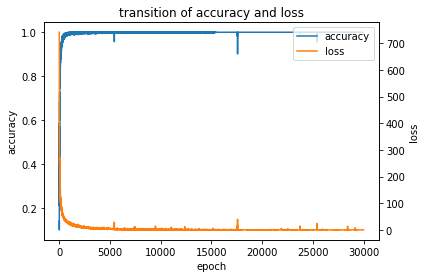

<< noise 10 [%] done >>
<< successfully layers are updated >>
<< noise 11 [%] >>
--------- epoch0 ---------
loss : 610.3278354678023
accuracy : 0.11262376237623763
time : 0.0020999908447265625 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.0529106430744726
accuracy : 0.9987623762376238
time : 17.81573987007141 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.5787064623653845
accuracy : 1.0
time : 36.09228587150574 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.29035965333046193
accuracy : 1.0
time : 53.93950581550598 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.12377365415644362
accuracy : 1.0
time : 72.3180239200592 [sec]
------------------------------

--------- epoch25000 ---------
loss : 2.4430412329442883
accuracy : 1.0
time : 90.20557188987732 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 108.904

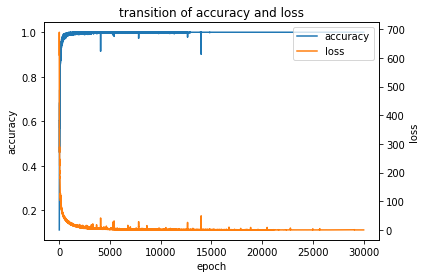

<< noise 11 [%] done >>
<< successfully layers are updated >>
<< noise 12 [%] >>
--------- epoch0 ---------
loss : 455.2004953613523
accuracy : 0.09158415841584158
time : 0.0020110607147216797 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.7153221961034175
accuracy : 1.0
time : 18.30241894721985 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.0745919922197178
accuracy : 0.9987623762376238
time : 37.04118013381958 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.5312935288068029
accuracy : 0.9987623762376238
time : 54.83072304725647 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.10851132395186039
accuracy : 1.0
time : 73.11394715309143 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.055825908333641996
accuracy : 1.0
time : 90.70343708992004 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elaps

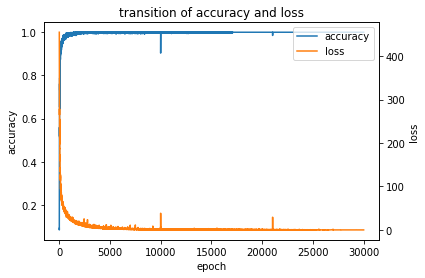

<< noise 12 [%] done >>
<< successfully layers are updated >>
<< noise 13 [%] >>
--------- epoch0 ---------
loss : 653.0812801323174
accuracy : 0.10891089108910891
time : 0.0020570755004882812 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.9122641492352868
accuracy : 0.9987623762376238
time : 17.795427083969116 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.45025058015452
accuracy : 1.0
time : 36.90921711921692 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.23627194243388688
accuracy : 1.0
time : 54.14539313316345 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.11650133599045084
accuracy : 1.0
time : 72.13799595832825 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.057225177691331466
accuracy : 1.0
time : 89.39389204978943 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 107.4

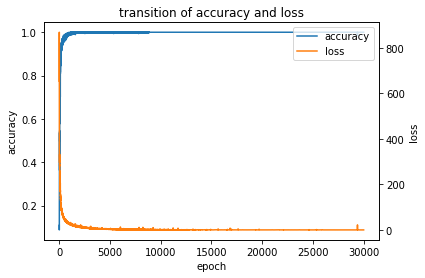

<< noise 13 [%] done >>
<< successfully layers are updated >>
<< noise 14 [%] >>
--------- epoch0 ---------
loss : 829.3324296915242
accuracy : 0.12376237623762376
time : 0.0019071102142333984 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.221662767434548
accuracy : 1.0
time : 17.609389066696167 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.8370818249228913
accuracy : 1.0
time : 35.884780168533325 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.3697926856508418
accuracy : 1.0
time : 53.00189518928528 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.5213391804365686
accuracy : 1.0
time : 71.49113297462463 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.053837845880571486
accuracy : 1.0
time : 88.73298811912537 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 106.89269995689392 [

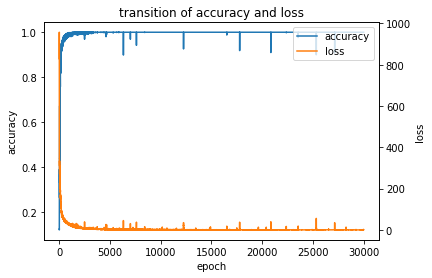

<< noise 14 [%] done >>
<< successfully layers are updated >>
<< noise 15 [%] >>
--------- epoch0 ---------
loss : 543.1388897442931
accuracy : 0.10148514851485149
time : 0.0017180442810058594 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.4543154520731165
accuracy : 0.9987623762376238
time : 18.29986310005188 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.4338424276644208
accuracy : 1.0
time : 37.23618698120117 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.08981158996256566
accuracy : 1.0
time : 54.83801603317261 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.04509191379062366
accuracy : 1.0
time : 73.51923298835754 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.3399881844288022
accuracy : 1.0
time : 90.98081707954407 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 109.67

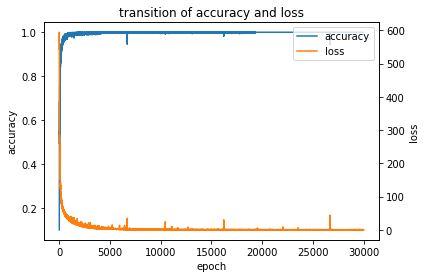

<< noise 15 [%] done >>
<< successfully layers are updated >>
<< noise 16 [%] >>
--------- epoch0 ---------
loss : 825.6591000338017
accuracy : 0.10396039603960396
time : 0.0018358230590820312 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.038964163307657
accuracy : 0.9975247524752475
time : 17.63163185119629 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.1610970985829767
accuracy : 1.0
time : 36.21797299385071 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.4148987138426302
accuracy : 1.0
time : 53.76321983337402 [sec]
------------------------------

--------- epoch20000 ---------
loss : 35.761377237785865
accuracy : 0.9381188118811881
time : 72.28509783744812 [sec]
------------------------------

--------- epoch25000 ---------
loss : 8.725452931017067
accuracy : 1.0
time : 89.65101194381714 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed ti

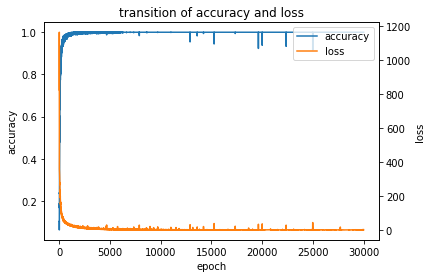

<< noise 16 [%] done >>
<< successfully layers are updated >>
<< noise 17 [%] >>
--------- epoch0 ---------
loss : 645.6716866052938
accuracy : 0.09034653465346534
time : 0.0017199516296386719 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.811119860256721
accuracy : 1.0
time : 17.96289896965027 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.6971591654354081
accuracy : 1.0
time : 35.87178897857666 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.5080057633208441
accuracy : 1.0
time : 53.44692587852478 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.17562014650412894
accuracy : 1.0
time : 71.72322988510132 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.11794286938576296
accuracy : 1.0
time : 89.79457092285156 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 107.89371609687805 [se

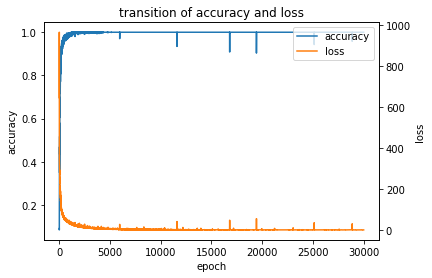

<< noise 17 [%] done >>
<< successfully layers are updated >>
<< noise 18 [%] >>
--------- epoch0 ---------
loss : 529.8267884424554
accuracy : 0.12128712871287128
time : 0.0019578933715820312 [sec]
--------------------------

--------- epoch5000 ---------
loss : 3.5770205238679136
accuracy : 0.9975247524752475
time : 18.859787940979004 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 2.190946606315443
accuracy : 1.0
time : 36.982465982437134 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.6305704574747804
accuracy : 0.9987623762376238
time : 55.34787201881409 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.2364264578202614
accuracy : 1.0
time : 73.13631796836853 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.035485890669660666
accuracy : 1.0
time : 91.33237600326538 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elaps

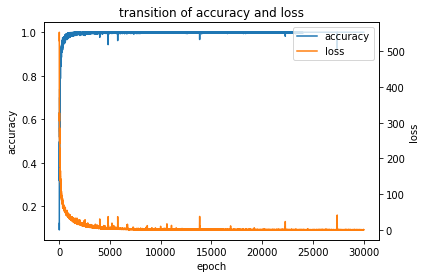

<< noise 18 [%] done >>
<< successfully layers are updated >>
<< noise 19 [%] >>
--------- epoch0 ---------
loss : 633.7073977284194
accuracy : 0.13985148514851486
time : 0.0014848709106445312 [sec]
--------------------------

--------- epoch5000 ---------
loss : 1.4422318769861273
accuracy : 1.0
time : 18.45039391517639 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.1998236727015084
accuracy : 0.9987623762376238
time : 36.422693967819214 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.9977784151636112
accuracy : 1.0
time : 55.06345295906067 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.059849806073094314
accuracy : 1.0
time : 73.1598289012909 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.27634305402736914
accuracy : 1.0
time : 92.48851299285889 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 110.5

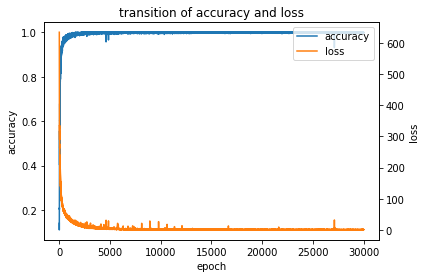

<< noise 19 [%] done >>
<< successfully layers are updated >>
<< noise 20 [%] >>
--------- epoch0 ---------
loss : 525.7607023153157
accuracy : 0.06311881188118812
time : 0.0015838146209716797 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.876010243170163
accuracy : 0.9975247524752475
time : 18.68312692642212 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.9281131829768914
accuracy : 0.9975247524752475
time : 36.347537994384766 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.5193061898973346
accuracy : 1.0
time : 54.65650987625122 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.9423622098989385
accuracy : 0.9975247524752475
time : 72.18900680541992 [sec]
------------------------------

--------- epoch25000 ---------
loss : 1.1041175061711401
accuracy : 0.9987623762376238
time : 90.65938997268677 [sec]
------------------------------



<< All training epochs ended. >>
=====

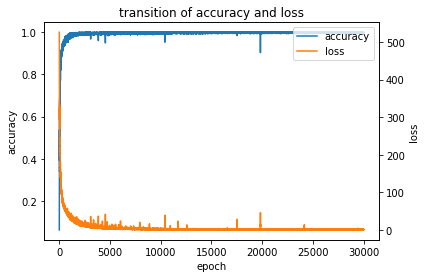

<< noise 20 [%] done >>
<< successfully layers are updated >>
<< noise 21 [%] >>
--------- epoch0 ---------
loss : 840.7239339625232
accuracy : 0.10148514851485149
time : 0.0015730857849121094 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.6776240748589926
accuracy : 0.9987623762376238
time : 18.829850912094116 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.142829541269688
accuracy : 0.9987623762376238
time : 36.33221197128296 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.7403447792910411
accuracy : 1.0
time : 55.195528984069824 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.1341659570766941
accuracy : 1.0
time : 72.65006804466248 [sec]
------------------------------

--------- epoch25000 ---------
loss : 4.382664374719848
accuracy : 0.9987623762376238
time : 90.93419909477234 [sec]
------------------------------



<< All training epochs ended. >>
========= result ===

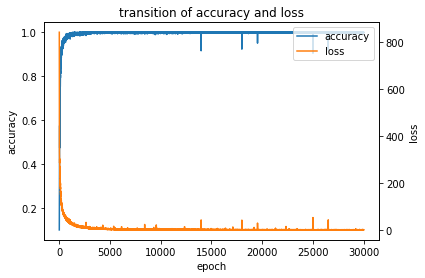

<< noise 21 [%] done >>
<< successfully layers are updated >>
<< noise 22 [%] >>
--------- epoch0 ---------
loss : 580.0042184184075
accuracy : 0.10024752475247525
time : 0.0014469623565673828 [sec]
--------------------------

--------- epoch5000 ---------
loss : 7.5466745511019955
accuracy : 0.9900990099009901
time : 18.87134099006653 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 2.7855910173471345
accuracy : 0.9975247524752475
time : 36.51021099090576 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.6645541502874589
accuracy : 1.0
time : 55.334489822387695 [sec]
------------------------------

--------- epoch20000 ---------
loss : 1.2221030723651503
accuracy : 0.9962871287128713
time : 72.94351100921631 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.569518123696108
accuracy : 1.0
time : 91.87117981910706 [sec]
------------------------------



<< All training epochs ended. >>
========= result ===

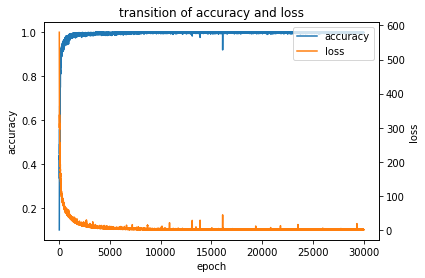

<< noise 22 [%] done >>
<< successfully layers are updated >>
<< noise 23 [%] >>
--------- epoch0 ---------
loss : 467.36041096914647
accuracy : 0.1745049504950495
time : 0.0022339820861816406 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.851128500369699
accuracy : 1.0
time : 18.952097177505493 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.8360142383836424
accuracy : 1.0
time : 37.31443119049072 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.32774232515764123
accuracy : 1.0
time : 55.00883102416992 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.16340825911516085
accuracy : 1.0
time : 73.20443916320801 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.12444722041153063
accuracy : 1.0
time : 90.84891605377197 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed time : 109.07722902297974 [

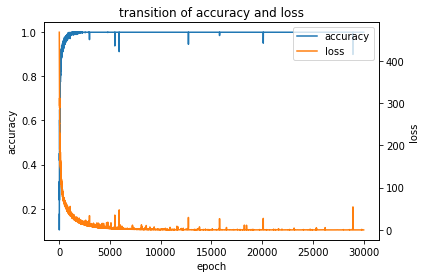

<< noise 23 [%] done >>
<< successfully layers are updated >>
<< noise 24 [%] >>
--------- epoch0 ---------
loss : 537.2173565712285
accuracy : 0.11757425742574257
time : 0.001753091812133789 [sec]
--------------------------

--------- epoch5000 ---------
loss : 5.0807421057821625
accuracy : 0.9987623762376238
time : 18.199667930603027 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.7990990923732599
accuracy : 1.0
time : 36.66670608520508 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.9676008070973288
accuracy : 0.9987623762376238
time : 54.418536901474 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.12941490160490238
accuracy : 1.0
time : 72.51467108726501 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.06695854099396074
accuracy : 1.0
time : 90.0191159248352 [sec]
------------------------------



<< All training epochs ended. >>
========= result =========
Elapsed t

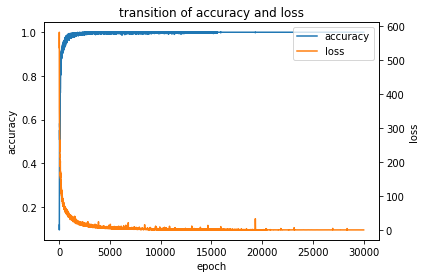

<< noise 24 [%] done >>
<< successfully layers are updated >>
<< noise 25 [%] >>
--------- epoch0 ---------
loss : 607.0960235247143
accuracy : 0.09777227722772278
time : 0.0017418861389160156 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.369008860513063
accuracy : 0.995049504950495
time : 18.27505588531494 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.8185444486355211
accuracy : 0.9975247524752475
time : 36.96118092536926 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.8590511215945862
accuracy : 0.9987623762376238
time : 55.37998390197754 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.3085014902257308
accuracy : 1.0
time : 73.96606278419495 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.9083722904359022
accuracy : 1.0
time : 91.74872088432312 [sec]
------------------------------



<< All training epochs ended. >>
========= result =====

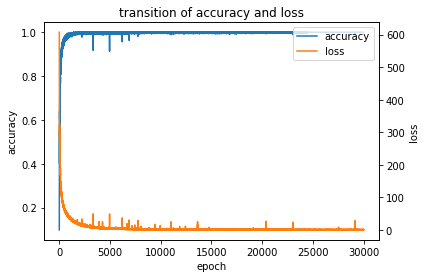

<< noise 25 [%] done >>
<< successfully layers are updated >>
<< noise 26 [%] >>
--------- epoch0 ---------
loss : 663.8441177511578
accuracy : 0.13242574257425743
time : 0.002393007278442383 [sec]
--------------------------

--------- epoch5000 ---------
loss : 4.791327344764241
accuracy : 0.9925742574257426
time : 17.94073486328125 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 1.8382292852088458
accuracy : 0.9975247524752475
time : 36.277209997177124 [sec]
------------------------------

--------- epoch15000 ---------
loss : 2.1747328852740155
accuracy : 0.9975247524752475
time : 53.848665952682495 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.5199202353806675
accuracy : 0.9987623762376238
time : 72.10899806022644 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.45014962611131965
accuracy : 0.9987623762376238
time : 89.32186985015869 [sec]
------------------------------



<< All training epochs

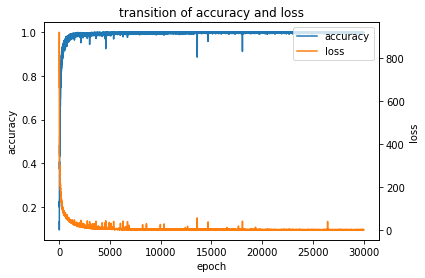

<< noise 26 [%] done >>
<< successfully layers are updated >>
<< noise 27 [%] >>
--------- epoch0 ---------
loss : 549.6852424208654
accuracy : 0.10396039603960396
time : 0.001567840576171875 [sec]
--------------------------

--------- epoch5000 ---------
loss : 7.6923785214701335
accuracy : 0.9962871287128713
time : 17.93836998939514 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 3.4114693349583693
accuracy : 0.9962871287128713
time : 36.650923013687134 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.7826140348117139
accuracy : 0.9987623762376238
time : 54.23411583900452 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.8319991155952109
accuracy : 0.9987623762376238
time : 72.96970701217651 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.6754834148999829
accuracy : 0.9987623762376238
time : 90.37496089935303 [sec]
------------------------------



<< All training epochs 

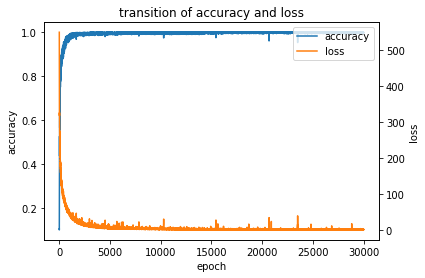

<< noise 27 [%] done >>
<< successfully layers are updated >>
<< noise 28 [%] >>
--------- epoch0 ---------
loss : 614.2933327436187
accuracy : 0.06064356435643564
time : 0.00156402587890625 [sec]
--------------------------

--------- epoch5000 ---------
loss : 2.68225288036935
accuracy : 0.9962871287128713
time : 17.833153009414673 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 0.5360786346039845
accuracy : 0.9987623762376238
time : 36.92139410972595 [sec]
------------------------------

--------- epoch15000 ---------
loss : 0.09668285823577888
accuracy : 1.0
time : 54.56891107559204 [sec]
------------------------------

--------- epoch20000 ---------
loss : 0.8511815114475861
accuracy : 0.9975247524752475
time : 73.3550341129303 [sec]
------------------------------

--------- epoch25000 ---------
loss : 0.010861141508439687
accuracy : 1.0
time : 91.06703996658325 [sec]
------------------------------



<< All training epochs ended. >>
========= result ====

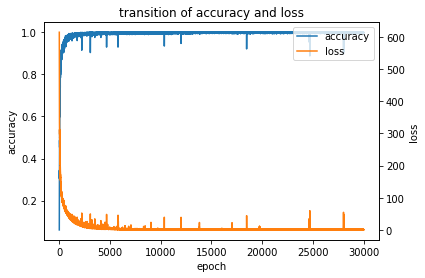

<< noise 28 [%] done >>
<< successfully layers are updated >>
<< noise 29 [%] >>
--------- epoch0 ---------
loss : 841.9773781435256
accuracy : 0.09158415841584158
time : 0.001432180404663086 [sec]
--------------------------

--------- epoch5000 ---------
loss : 6.836301696948285
accuracy : 0.9913366336633663
time : 18.164400100708008 [sec]
-----------------------------

--------- epoch10000 ---------
loss : 3.832933811839001
accuracy : 0.9962871287128713
time : 36.34365105628967 [sec]
------------------------------

--------- epoch15000 ---------
loss : 4.738712895232597
accuracy : 0.9913366336633663
time : 54.12111806869507 [sec]
------------------------------

--------- epoch20000 ---------
loss : 2.764312894376143
accuracy : 0.995049504950495
time : 72.00131511688232 [sec]
------------------------------

--------- epoch25000 ---------
loss : 3.2336006604760774
accuracy : 0.9938118811881188
time : 89.89811611175537 [sec]
------------------------------



<< All training epochs ended

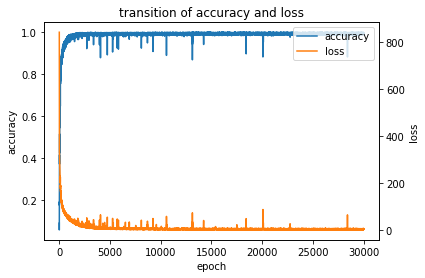

<< noise 29 [%] done >>


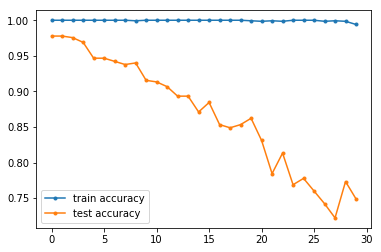

In [21]:
all_train_acc_list = list()
all_test_acc_list = list()
epochs = [500,1000,5000,10000,15000,20000,30000]
for epoch in epochs:
    test_acc_list = list()
    train_acc_list = list()
    for i in range(0,30):
        net = neuralNetwork(
        epoch = epoch,
        learning_rate = 0.0005,
        log_frequency = 5000
        )
        layer_list = [64,[70,40],10]
        net.set_layer(layer_list)
        print('<< noise {} [%] >>'.format(i))
        tmp_x = x.copy()
        for p in range(tmp_x.shape[0]):
            if i == 0:
                break
            for q in range(tmp_x.shape[1]):
                alpha = np.random.rand()*100/i
                if alpha < 1:
                    tmp_x[p,q] = alpha
        x_train,x_test,t_train,t_test = train_test_split(
            tmp_x,
            t,
            random_state = 0
        )
        elapsed,train_acc = net.train(x_train,t_train)
        train_acc_list.append(train_acc)
        acc = net.accuracy(x_test,t_test)
        test_acc_list.append(acc)
        net.visualize()
        print('<< noise {} [%] done >>'.format(i))
        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax_x = np.linspace(0,29,30)
    ax.plot(
        ax_x,
        train_acc_list,
        marker = '.',
        label = 'train accuracy'
    )
    ax.plot(
        ax_x,
        test_acc_list,
        marker = '.',
        label = 'test accuracy'
    )
    plt.legend()
    plt.show()
    all_train_acc_list.append(train_acc_list)
    all_test_acc_list.append(test_acc_list)
    
        

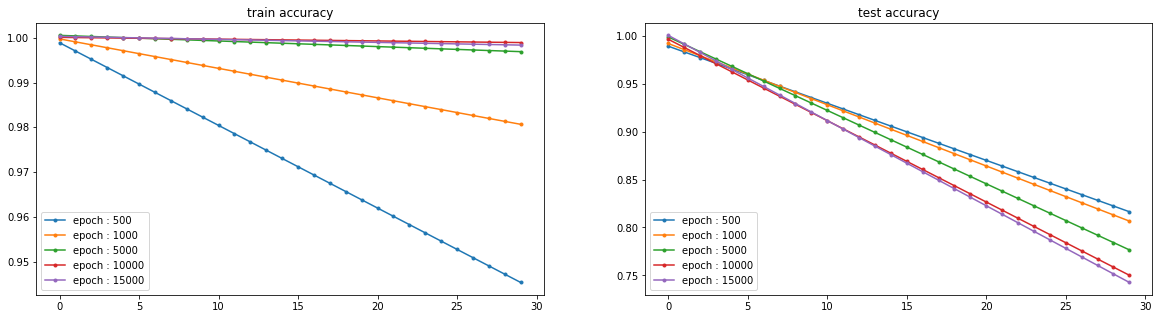

In [56]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax_x = np.linspace(0,29,30)

for i in range(0,5):
    train_acc = all_train_acc_list[i]
    test_acc = all_test_acc_list[i]
    reg = MultipleLinearRegression()
    ax_sub = np.array(ax_x)
    ax_sub = ax_sub.reshape((-1,1))
    reg.fit(ax_sub,train_acc)
    ax1.plot(
        ax_x,
        reg.predict(ax_sub),
        marker = '.',
        label = 'epoch : {}'.format(epochs[i])
    )
    reg = MultipleLinearRegression()
    ax_sub = np.array(ax_x)
    ax_sub = ax_sub.reshape((-1,1))
    reg.fit(ax_sub,test_acc)
    ax2.plot(
        ax_x,
        reg.predict(ax_sub),
        marker = '.',
        label = 'epoch : {}'.format(epochs[i])
    )
ax1.legend( loc='lower left')
ax2.legend( loc='lower left')
ax1.set_title('train accuracy')
ax2.set_title('test accuracy')



plt.show()

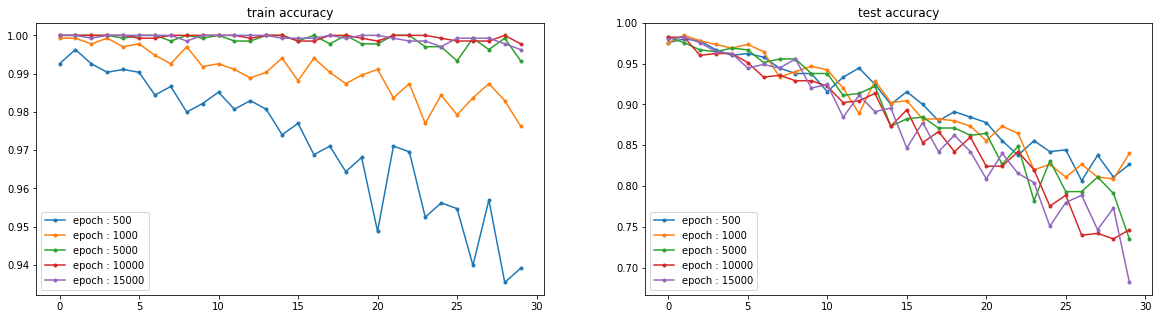

In [55]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax_x = np.linspace(0,29,30)

for i in range(0,5):
    train_acc = all_train_acc_list[i]
    test_acc = all_test_acc_list[i]
    ax1.plot(
        ax_x,
        train_acc,
        marker = '.',
        label = 'epoch : {}'.format(epochs[i])
    )
    
    ax2.plot(
        ax_x,
        test_acc,
        marker = '.',
        label = 'epoch : {}'.format(epochs[i])
    )
ax1.legend( loc='lower left')
ax2.legend( loc='lower left')
ax1.set_title('train accuracy')
ax2.set_title('test accuracy')

plt.show()

In [46]:
from algorithm import MultipleLinearRegression

In [43]:
import pprint
import os
from pathlib import Path

Path().resolve()

pprint.pprint(sys.path)

['',
 '/opt/anaconda3/envs/opencv/lib/python35.zip',
 '/opt/anaconda3/envs/opencv/lib/python3.5',
 '/opt/anaconda3/envs/opencv/lib/python3.5/plat-darwin',
 '/opt/anaconda3/envs/opencv/lib/python3.5/lib-dynload',
 '/Users/kurokitakuo/.local/lib/python3.5/site-packages',
 '/opt/anaconda3/envs/opencv/lib/python3.5/site-packages',
 '/opt/anaconda3/envs/opencv/lib/python3.5/site-packages/aeosa',
 '/opt/anaconda3/envs/opencv/lib/python3.5/site-packages/IPython/extensions',
 '/Users/kurokitakuo/.ipython',
 '~/desktop/パターン情報学/scripts']


In [45]:
sys.path.append('/Users/kurokitakuo/desktop/パターン情報学/scripts')

In [ ]:
from 